In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
import numpy as np
from math import sqrt

In [3]:
import networkx as nx
from operator import itemgetter

In [4]:
from matplotlib import cm
import matplotlib as mpl
import collections as col

# Data process

In [5]:
# read in data
df_udg = pd.read_csv('data/london_flows.csv')
df_udg = df_udg.rename(columns={'station_origin':'Orig','station_destination':'Dest','population':'Oi1_pop','jobs':'Dj2_job'})
df_udg

,Orig,Dest,flows,Oi1_pop,Dj2_job,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167
...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795550
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554


In [6]:
# drop distance=0
df_udg = df_udg.drop(df_udg[df_udg.distance==0].index)

# relace 0 in Oi1 Dj2
df_udg['Oi1_pop'].replace(0,0.00000001,inplace = True)
df_udg['Dj2_job'].replace(0,0.00000001,inplace = True)

In [7]:
df_udg

,Orig,Dest,flows,Oi1_pop,Dj2_job,distance
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167
...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892.0,3342.0,13401.795550
61470,Woolwich Arsenal,West Ham,608,7892.0,5487.0,8701.454361
61471,Woolwich Arsenal,West India Quay,6,7892.0,400.0,9536.720451
61472,Woolwich Arsenal,West Silvertown,81,7892.0,893.0,5355.248554


In [8]:
#Create pivot table

submat_udg = pd.pivot_table(df_udg, values ="flows", index="Orig", columns = "Dest",
                            aggfunc=np.sum, margins=True)

submat_udg

Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


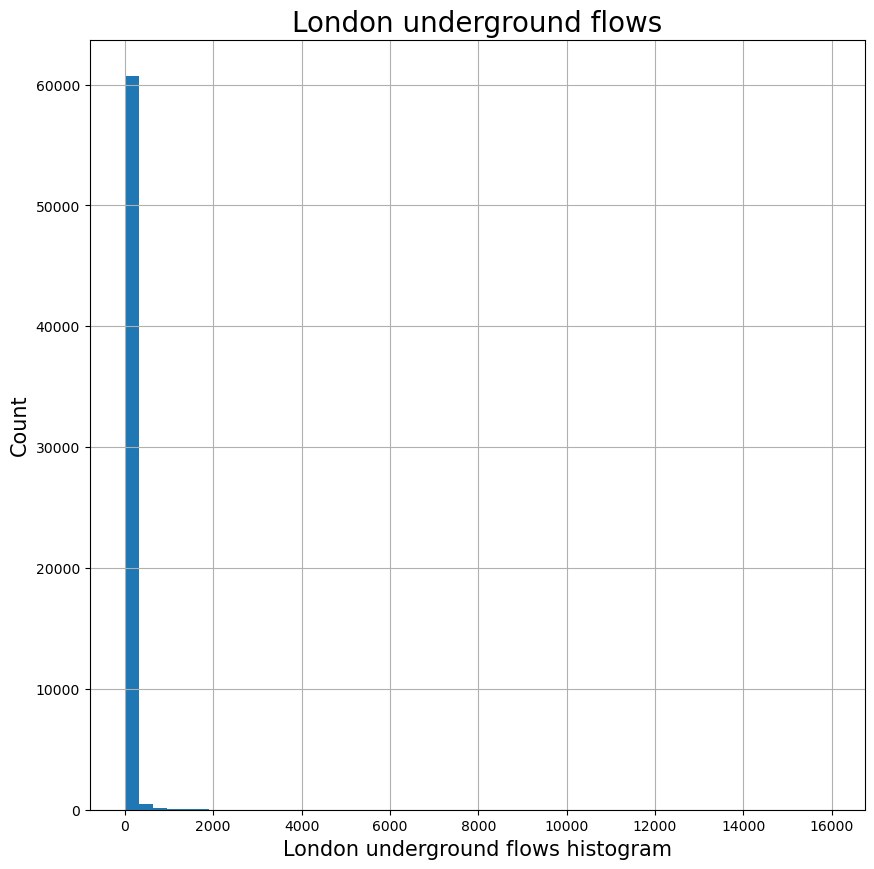

In [9]:
# Check the Poissony distribution of Flows

plt.subplots(figsize=(10,10))

plt.hist(df_udg["flows"], histtype="stepfilled" , bins = 50)
plt.xlabel("London underground flows histogram", fontsize = 15)
plt.ylabel("Count", fontsize= 15)
plt.title("London underground flows", fontsize = 20)
plt.grid(True)

plt.savefig('plot/Poisson distribution.png')
plt.show()

It is Poissony distribution.

### The Poisson Regression Spatial Interaction Model

So, we can now re-specify Equation 5 as a Poisson Regression model. Basically, we are assuming that the flows follow a Poisson distribution, such that the expected value $\lambda_{ij}$ verifies:

\begin{equation} \tag{6}
\lambda_{ij} = \exp (K + \alpha \ln O_i + \gamma \ln D_j - \beta \ln d_{ij})
\end{equation}

What this model says is that $\lambda_{ij}$ (our independent variable - the estimate of $T_{ij}$) is <i>logarithmically linked </i> to (or modelled by) a linear combination of the logged independent variables in the model. 

Now we have Equation 6 at our disposal, we can use a Poisson regression model to produce estimated of $k$, $\alpha$, $\gamma$ and $\beta$ - or put another way, we can use the rgeression model to calibrate our parameters.

So, let's have a go at doing it!

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#take the variables and produce logarithms of them
x_variables = ["Oi1_pop", "Dj2_job", "distance"]
log_x_vars = []
for x in x_variables:
    df_udg[f"log_{x}"] = np.log(df_udg[x])
    log_x_vars.append(f"log_{x}")

#create the formula
formula = 'flows ~ log_Oi1_pop + log_Dj2_job + log_distance'

#run the regression
uncosim = smf.glm(formula = formula, 
                  data=df_udg, 
                  family=sm.families.Poisson()).fit()

In [11]:
#extract the summary of the constrained model
print(uncosim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    61452
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2785e+06
Date:                Tue, 03 May 2022   Deviance:                   2.3848e+06
Time:                        03:11:55   Pearson chi2:                 4.76e+06
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.7475      0.014   -273.078   

In [12]:
#first assign the parameter values from the model to the appropriate variables
K = uncosim.params[0]
alpha = uncosim.params[1]
gamma = uncosim.params[2]
beta = -uncosim.params[3]

#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
df_udg["unconstrainedEst2"] = np.exp(K 
                                       + alpha*df_udg["log_Oi1_pop"] 
                                       + gamma*df_udg["log_Dj2_job"] 
                                       - beta*df_udg["log_distance"])

#or we can just extract the results from the actual poisson regression and apply them to the data
predictions = uncosim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
df_udg["fitted"] = predictions_summary_frame["mean"]

In [13]:
uncosim.mu

array([49.61799552,  0.93719499,  2.12137455, ...,  5.34848651,
       14.11446759, 12.3877383 ])

In [14]:
#round the numbers so that we don't get a half of a person
df_udg["unconstrainedEst2"] = round(df_udg["unconstrainedEst2"], 0)
#convert to integers
df_udg["unconstrainedEst2"] = df_udg["unconstrainedEst2"].astype(int)
#check that the sum of these estimates make sense
sum(df_udg["unconstrainedEst2"])

1542355

In [15]:
submat_udg2 = df_udg.pivot_table(values ="unconstrainedEst2", index="Orig", columns = "Dest",
                            aggfunc=np.sum, margins=True)
submat_udg2

Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,392
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,333
Acton Town,NaN,NaN,NaN,21.0,21.0,NaN,7.0,1.0,NaN,22.0,...,18.0,3.0,6.0,11.0,NaN,2.0,NaN,3.0,NaN,3862
Aldgate,NaN,NaN,7.0,NaN,81.0,NaN,NaN,1.0,NaN,47.0,...,14.0,NaN,8.0,6.0,NaN,3.0,NaN,3.0,NaN,6107
Aldgate East,NaN,NaN,7.0,85.0,NaN,NaN,3.0,1.0,NaN,48.0,...,14.0,3.0,8.0,7.0,NaN,3.0,NaN,3.0,NaN,6470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,26.0,28.0,NaN,NaN,NaN,NaN,25.0,...,14.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,3707
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
Woodside Park,NaN,NaN,5.0,18.0,18.0,NaN,2.0,NaN,NaN,21.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2648


### Testing the 'Goodness of fit'

In [16]:
def CalcRSquared(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [17]:
CalcRSquared(df_udg["flows"], df_udg["unconstrainedEst2"])

0.3212076758264851

In [18]:
CalcRMSE(df_udg["flows"], df_udg["unconstrainedEst2"])

108.296

# Scenario A
Assume that Canary Wharf has a 50% decrease in jobs after Brexit. Using the calibrated parameter beta, compute the new flows for scenario A. Make sure the number of commuters is conserved.

In [19]:
df_udg

,Orig,Dest,flows,Oi1_pop,Dj2_job,distance,log_Oi1_pop,log_Dj2_job,log_distance,unconstrainedEst2,fitted
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,50,49.617996
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1,0.937195
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,2,2.121375
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53,53.297014
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,32,32.208586
...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892.0,3342.0,13401.795550,8.973605,8.114325,9.503144,22,21.756302
61470,Woolwich Arsenal,West Ham,608,7892.0,5487.0,8701.454361,8.973605,8.610137,9.071245,42,41.516290
61471,Woolwich Arsenal,West India Quay,6,7892.0,400.0,9536.720451,8.973605,5.991465,9.162905,5,5.348487
61472,Woolwich Arsenal,West Silvertown,81,7892.0,893.0,5355.248554,8.973605,6.794587,8.585832,14,14.114468


Production constrained model

In [20]:
#create the formula (the "-1" indicates no intercept in the regression model).
formula = 'flows ~ Orig + log_Dj2_job + log_distance-1'
#run a production constrained sim
prodSim = smf.glm(formula = formula, data=df_udg, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(prodSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    61055
Model Family:                 Poisson   Df Model:                          400
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0169e+06
Date:                Tue, 03 May 2022   Deviance:                   1.8615e+06
Time:                        03:13:30   Pearson chi2:                 2.78e+06
No. Iterations:                    26   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Orig[A

## Model Estimates (3.2)

In [21]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(df_udg.groupby(["Orig"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
df_udg = df_udg.merge(O_i, on = "Orig", how = "left" )

D_j = pd.DataFrame(df_udg.groupby(["Dest"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
df_udg = df_udg.merge(D_j, on = "Dest", how = "left" )

Now we want to fish the coefficients out of the prodSim glm object.

In [22]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(Orig)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
df_udg = df_udg.merge(coefs, left_on="Orig", right_on="coef", how = "left")
df_udg.drop(columns = ["coef"], inplace = True)
#check this has worked
df_udg.head()

E:\ProgramFiles\Anaconda\envs\urbsim\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


,Orig,Dest,flows,Oi1_pop,Dj2_job,distance,log_Oi1_pop,log_Dj2_job,log_distance,unconstrainedEst2,fitted,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,50,49.617996,599,78549,3.250242
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1,0.937195,599,442,3.250242
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,2,2.121375,599,665,3.250242
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53,53.297014,599,58772,3.250242
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,32,32.208586,599,15428,3.250242


In [23]:
alpha_i = prodSim.params[0:-3]
gamma = prodSim.params[-2]
beta = -prodSim.params[-1]

In [24]:
alpha_i

Orig[Abbey Road]         3.250242
Orig[Acton Central]      5.016902
Orig[Acton Town]         4.562892
Orig[Aldgate]            3.323767
Orig[Aldgate East]       3.457664
                           ...   
Orig[Wood Lane]          3.154679
Orig[Wood Street]        5.242024
Orig[Woodford]           5.160643
Orig[Woodgrange Park]    5.254667
Orig[Woodside Park]      4.698635
Length: 398, dtype: float64

In [25]:
gamma

0.7686156200268506

In [26]:
beta

0.878119118369419

And we're ready to generate our estimates:

In [27]:
df_udg["prodsimest1"] = np.exp(df_udg["alpha_i"]+gamma*df_udg["log_Dj2_job"] 
                                 - beta*df_udg["log_distance"])
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
df_udg.head(10)

,Orig,Dest,flows,Oi1_pop,Dj2_job,distance,log_Oi1_pop,log_Dj2_job,log_distance,unconstrainedEst2,fitted,O_i,D_j,alpha_i,prodsimest1
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,50,49.617996,599,78549,3.250242,55.010681
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1,0.937195,599,442,3.250242,0.986106
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,2,2.121375,599,665,3.250242,2.755640
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53,53.297014,599,58772,3.250242,66.457296
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,32,32.208586,599,15428,3.250242,49.060970
5,Abbey Road,Crossharbour,1,599.0,1208.0,6686.475560,6.395262,7.096721,8.807842,2,2.340152,599,1208,3.250242,2.639418
6,Abbey Road,Custom House,0,599.0,845.0,3824.855630,6.395262,6.739337,8.249276,3,2.524914,599,845,3.250242,3.275120
7,Abbey Road,Cutty Sark,2,599.0,1748.0,8503.898909,6.395262,7.466228,9.048280,3,2.668661,599,1748,3.250242,2.838948
8,Abbey Road,Cyprus,7,599.0,850.0,6532.099618,6.395262,6.745236,8.784484,2,1.817327,599,850,3.250242,2.056310
9,Abbey Road,Devons Road,1,599.0,611.0,3958.324171,6.395262,6.415097,8.283576,2,1.931266,599,611,3.250242,2.476929


## Assessing the model output

In [28]:
#first round the estimates
df_udg["prodsimest1"] = round(df_udg["prodsimest1"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
submat_udg3 = df_udg.pivot_table(values ="prodsimest1", index="Orig", columns = "Dest",
                            aggfunc=np.sum, margins=True)
submat_udg3

Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,16.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3749.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,21.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2882.0
Aldgate East,NaN,NaN,2.0,52.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,32.0,...,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4866.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


In [29]:
submat_udg

Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [30]:
submat_udg2

Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,392
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,333
Acton Town,NaN,NaN,NaN,21.0,21.0,NaN,7.0,1.0,NaN,22.0,...,18.0,3.0,6.0,11.0,NaN,2.0,NaN,3.0,NaN,3862
Aldgate,NaN,NaN,7.0,NaN,81.0,NaN,NaN,1.0,NaN,47.0,...,14.0,NaN,8.0,6.0,NaN,3.0,NaN,3.0,NaN,6107
Aldgate East,NaN,NaN,7.0,85.0,NaN,NaN,3.0,1.0,NaN,48.0,...,14.0,3.0,8.0,7.0,NaN,3.0,NaN,3.0,NaN,6470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,26.0,28.0,NaN,NaN,NaN,NaN,25.0,...,14.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,3707
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
Woodside Park,NaN,NaN,5.0,18.0,18.0,NaN,2.0,NaN,NaN,21.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2648


In [31]:
CalcRSquared(df_udg["flows"], df_udg["prodsimest1"])

0.38829196662967225

In [32]:
CalcRMSE(df_udg["flows"], df_udg["prodsimest1"])

102.857

## What if: change Canary Wharf-job to 50% (4.1)

In [33]:
def new_sal(row):
    if row["Dest"] == "Canary Wharf":
        val = row['Dj2_job']*0.5
    else:
        val = row["Dj2_job"]
    return val
        
df_udg["Dj3_jobSnA"] = df_udg.apply(new_sal, axis =1)
df_udg.head(10)

,Orig,Dest,flows,Oi1_pop,Dj2_job,distance,log_Oi1_pop,log_Dj2_job,log_distance,unconstrainedEst2,fitted,O_i,D_j,alpha_i,prodsimest1,Dj3_jobSnA
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,50,49.617996,599,78549,3.250242,55.0,78549.0
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1,0.937195,599,442,3.250242,1.0,442.0
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,2,2.121375,599,665,3.250242,3.0,665.0
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53,53.297014,599,58772,3.250242,66.0,29386.0
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,32,32.208586,599,15428,3.250242,49.0,15428.0
5,Abbey Road,Crossharbour,1,599.0,1208.0,6686.475560,6.395262,7.096721,8.807842,2,2.340152,599,1208,3.250242,3.0,1208.0
6,Abbey Road,Custom House,0,599.0,845.0,3824.855630,6.395262,6.739337,8.249276,3,2.524914,599,845,3.250242,3.0,845.0
7,Abbey Road,Cutty Sark,2,599.0,1748.0,8503.898909,6.395262,7.466228,9.048280,3,2.668661,599,1748,3.250242,3.0,1748.0
8,Abbey Road,Cyprus,7,599.0,850.0,6532.099618,6.395262,6.745236,8.784484,2,1.817327,599,850,3.250242,2.0,850.0
9,Abbey Road,Devons Road,1,599.0,611.0,3958.324171,6.395262,6.415097,8.283576,2,1.931266,599,611,3.250242,2.0,611.0


Now let's plug these new values into the model and see how this changes the flows in the system ...

In [34]:
df_udg["prodsimest2"] = np.exp(df_udg["alpha_i"]+gamma*np.log(df_udg["Dj3_jobSnA"]) - beta*df_udg["log_distance"])

df_udg["prodsimest2"] = round(df_udg["prodsimest2"],0)
#now we can convert the pivot table into a matrix
submat_udg4 = df_udg.pivot_table(values ="prodsimest2", index="Orig", columns = "Dest",
                            aggfunc=np.sum, margins=True)
submat_udg4

Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,572.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,16.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3719.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,21.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2859.0
Aldgate East,NaN,NaN,2.0,52.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3134.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,32.0,...,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4790.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3060.0


You will notice that by increasing the average salary in Barking and Dagenham, we’ve increased flows into Barking and Dagenham, but have not reduced the flows into other zones - the original constraints are still working on the other zones. One way to get around this, now that we have calibrated our parameters, is to return to the multiplicative model in Equation 1 and run this model after calculating our own $A_i$ balancing factors.

In [35]:
#calculate some new wj^alpha and d_ij^beta values
Dj2_gamma = df_udg["Dj2_job"]**gamma
dist_beta = df_udg["distance"]**(-beta)
#calcualte the first stage of the Ai values
df_udg["Ai1"] = Dj2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(df_udg.groupby(["Orig"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
#and write the A_i values back into the dataframe
df_udg = df_udg.merge(A_i, left_on="Orig", right_index=True, how="left")

So that is it for calculating your $A_i$ values. Now you have these, it’s very simple to plug everything back into Equation 1 and generate some estimates…

In [36]:
#to check everything works, recreate the original estimates
df_udg["prodsimest3"] = df_udg["A_i"]*df_udg["O_i"]*Dj2_gamma*dist_beta
#round
df_udg["prodsimest3"] = round(df_udg["prodsimest3"])
#check
df_udg[["prodsimest1", "prodsimest3"]]

,prodsimest1,prodsimest3
0,55.0,55.0
1,1.0,1.0
2,3.0,3.0
3,66.0,66.0
4,49.0,49.0
...,...,...
61451,121.0,121.0
61452,259.0,259.0
61453,32.0,32.0
61454,98.0,98.0


They are same, nothing wrong

You should see that your new estimates are exactly the same as your first estimates. If they’re not, then something has gone wrong. Now we have this though, we can keep messing around with some new estimates and keep the constraints. Remember, though, that you will need to recalculate $A_i$ each time you want to create a new set of estimates. Let’s try with our new values for the destination salary in Barking and Dagenham

In [37]:
#calculate some new wj^alpha and d_ij^beta values
Dj3_gamma = df_udg["Dj3_jobSnA"]**gamma
#calcualte the first stage of the Ai values
df_udg["Ai1"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(df_udg.groupby(["Orig"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
df_udg = df_udg.merge(A_i, left_on="Orig", right_index=True, how="left")

Now we have some new $A_i$'s, let's generate some new scenario flow estimates...

In [38]:
#to check everything works, recreate the original estimates
df_udg["prodsimest4"] = df_udg["A_i2"]*df_udg["O_i"]*Dj3_gamma*dist_beta
#round
df_udg["prodsimest4"] = round(df_udg["prodsimest4"])

In [39]:
submat_udg_SnA = df_udg.pivot_table(values ="prodsimest4", index="Orig", columns = "Dest",
                            aggfunc=np.sum, margins=True)
submat_udg_SnA

Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,600.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,17.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3745.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,22.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2884.0
Aldgate East,NaN,NaN,2.0,53.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,36.0,39.0,NaN,NaN,NaN,NaN,33.0,...,16.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4863.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,5.0,21.0,21.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3091.0


In [40]:
submat_udg

Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


# Map drawing

In [41]:
G = nx.read_graphml('data/london_tubenetwork.graphml')

In [42]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [43]:
# we can also add the stations name to the edge attributes from the nodes attributes:

nod_name1={(e1,e2):(G.nodes[e1]['station_name']) for e1, e2 in G.edges()}
nod_name2={(e1,e2):(G.nodes[e2]['station_name']) for e1, e2 in G.edges()}

nx.set_edge_attributes(G,nod_name1,'station_1_')
nx.set_edge_attributes(G,nod_name2,'station_2_')

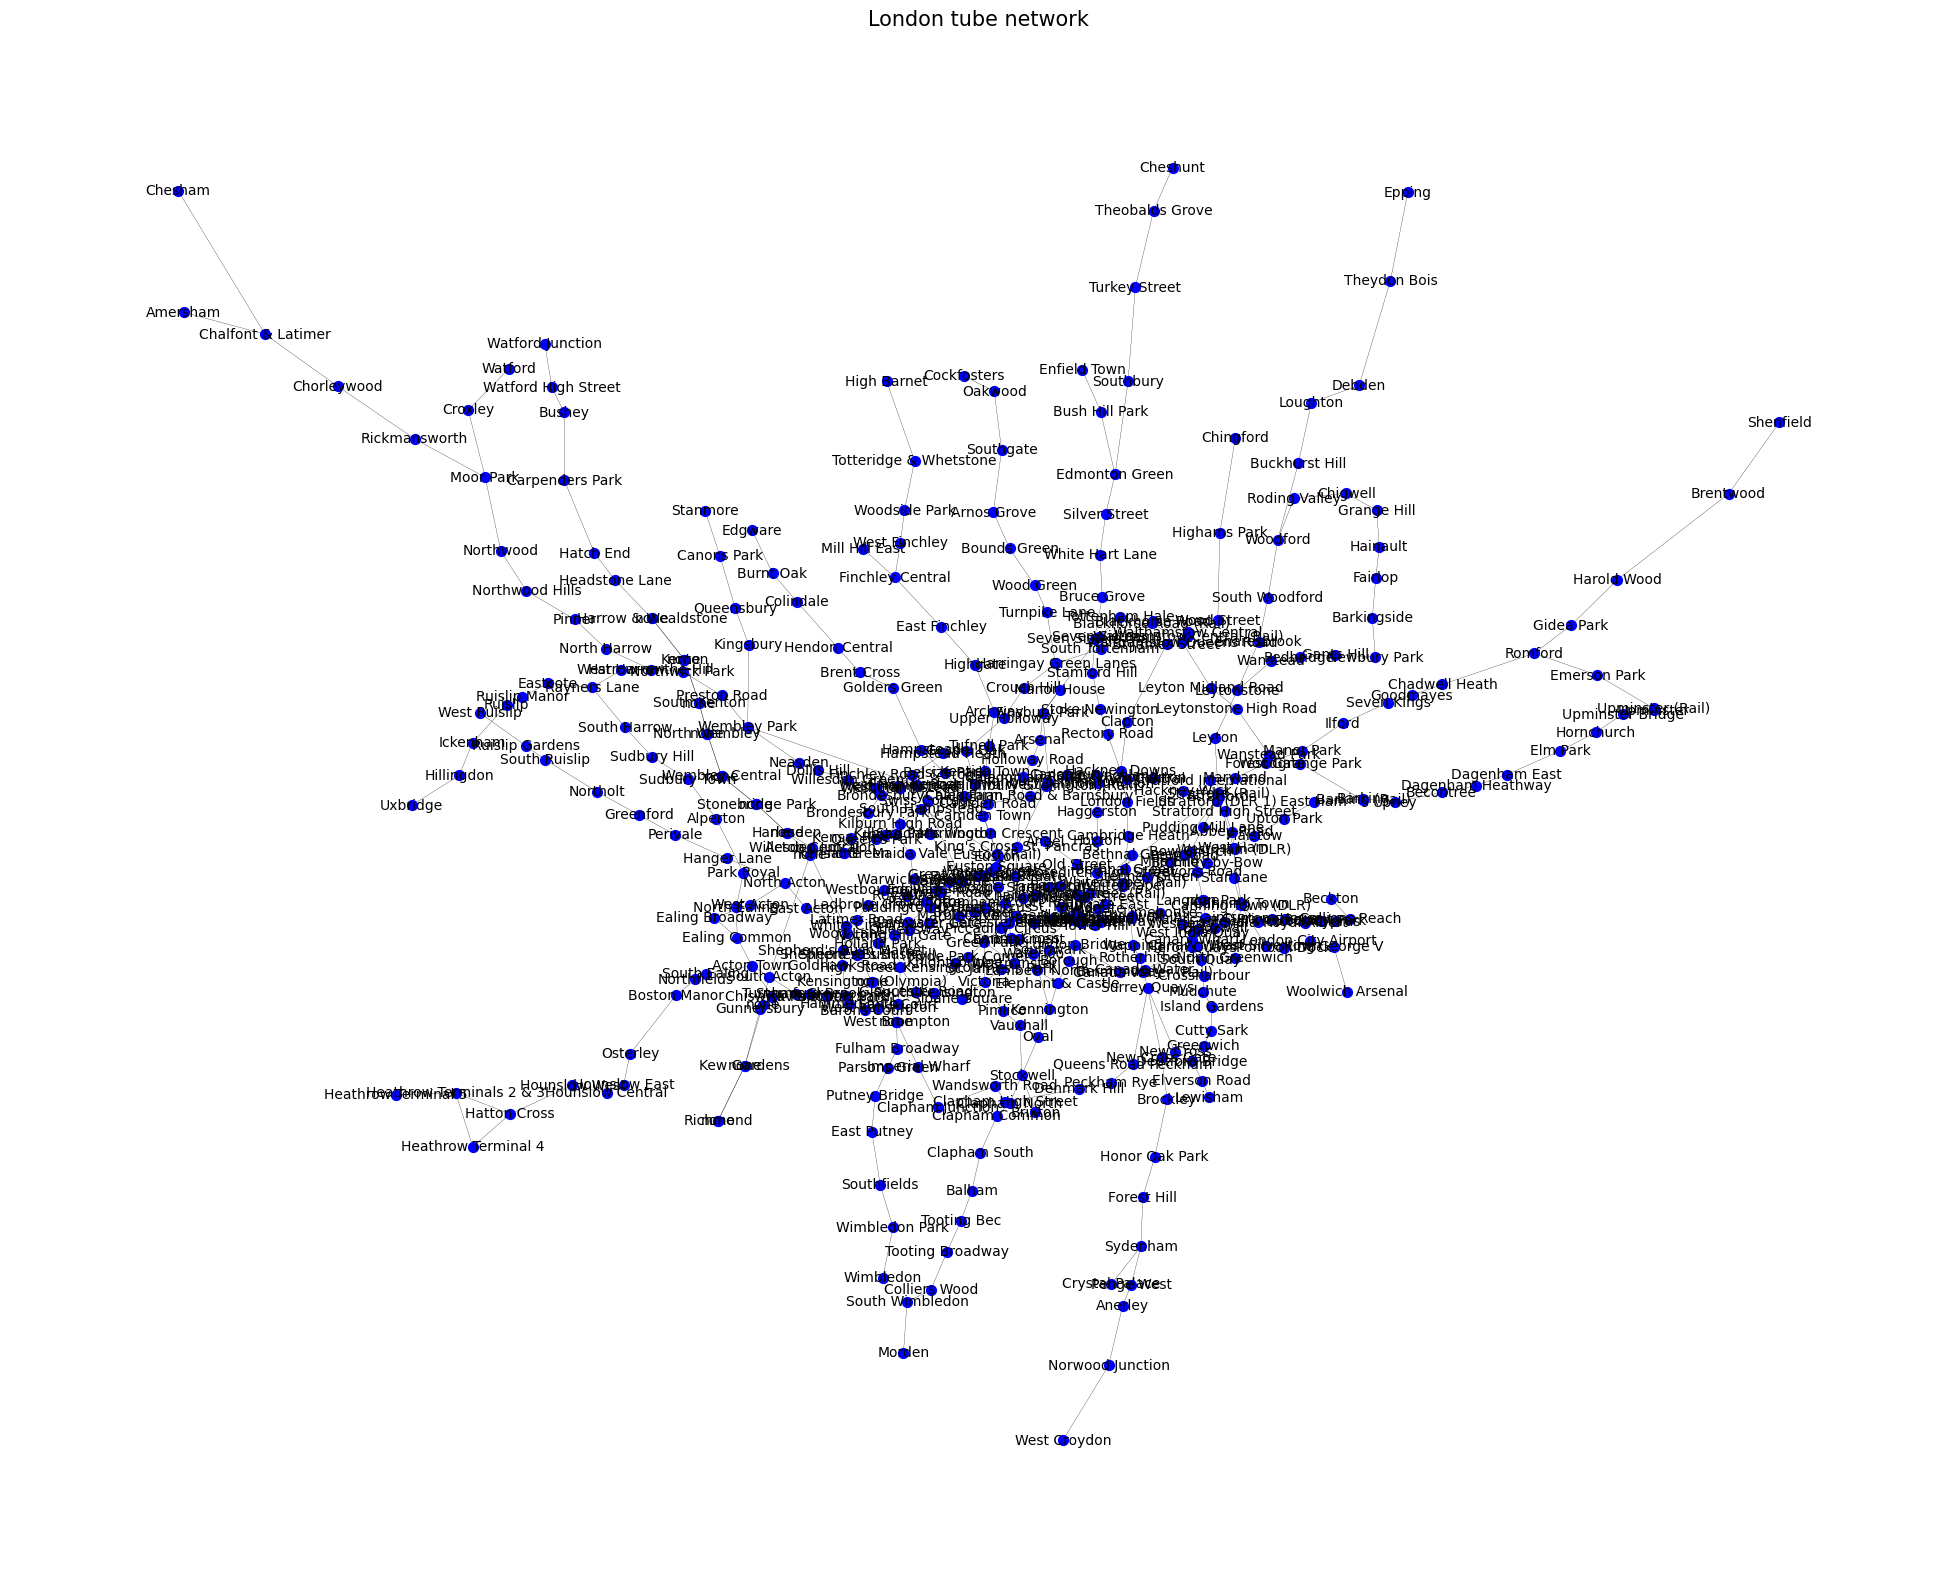

In [44]:
# Let's plot the tube network! 

# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

node_labels = nx.get_node_attributes(G, 'station_name')

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=10, font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()


In [45]:
 #We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
# df[0:10]

## Add orignal flow to the df

## Plot A flow

In [171]:
# groupby flows to dest
flow_dest_0 = df_udg.groupby(by='Dest').sum()
flow_dest_0['flowA'] = flow_dest_0['prodsimest4'] #flow A changed
flow_dest_0

,flows,Oi1_pop,Dj2_job,distance,log_Oi1_pop,log_Dj2_job,log_distance,unconstrainedEst2,fitted,O_i,...,Ai_exp,Bj_exp,SIM_est_exp,distance1,log_distance1,SIM_est_exp1,distance2,log_distance2,SIM_est_exp2,flowA
Dest,,,,,,,,,,,,,,,,,,,,,
Abbey Road,345,190997.0,11040.0,1.678493e+05,246.582464,186.993421,267.824439,222,222.938818,190958,...,0.001568,25.881222,344.0,3.356987e+05,290.005149,343.0,5.035480e+05,302.980032,346.0,470.0
Acton Central,750,266975.0,45750.0,8.757745e+05,455.568138,403.824466,573.147423,244,243.056580,266975,...,0.012332,228.481396,750.0,1.751549e+06,615.429401,750.0,2.627324e+06,640.162772,748.0,393.0
Acton Town,2202,1264084.0,510864.0,3.817095e+06,1870.497555,1785.732146,2215.762079,2490,2487.476130,1264016,...,63.343820,122.263063,2204.0,7.634190e+06,2376.572225,2182.0,1.145129e+07,2470.640130,2193.0,2182.0
Aldgate,7782,1218365.0,1836552.0,3.308639e+06,1893.939925,2114.458202,2196.472050,9785,9786.147681,1218297,...,63.474066,389.451116,7777.0,6.617279e+06,2360.054785,7779.0,9.925918e+06,2455.744550,7779.0,8836.0
Aldgate East,7932,1284827.0,1998864.0,3.363580e+06,2019.255417,2262.622443,2339.798551,10329,10332.008468,1284759,...,58.951232,337.581627,7934.0,6.727160e+06,2514.471641,7936.0,1.009074e+07,2616.648848,7930.0,9398.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wood Street,404,181592.0,14948.0,4.567405e+05,279.650426,222.052350,342.327989,122,124.640200,181591,...,0.017801,9.573414,402.0,9.134810e+05,367.974434,401.0,1.370221e+06,382.976643,402.0,342.0
Woodford,706,1165059.0,141200.0,4.388522e+06,1625.436193,1311.923047,1976.544078,803,805.296838,1164991,...,0.401819,19.963361,692.0,8.777044e+06,2115.173514,700.0,1.316557e+07,2196.266535,705.0,666.0
Woodgrange Park,242,88821.0,8712.0,6.042029e+05,263.128976,197.601758,343.989541,42,43.339543,88821,...,0.017662,27.533548,242.0,1.208406e+06,368.942839,240.0,1.812609e+06,383.539583,241.0,156.0


In [172]:
#获取G中的站名和编号
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))

# Merge df 和 flowAC
df = df.join(flow_dest_0,on='station_name',how='left')
# Bethnal Green is 重复的，因为一个是railway，一个是underground station 但是在flow里没有区分，所以删掉一个
#少了两个站可能因为Kensington 和 'Shepherd\'s Bush应该是有两个的，但是在flow里合成一个站了之类的

df = df[['station_name','flows','flowA']]
df

,station_name,flows,flowA
910GCAMHTH,Cambridge Heath,458.0,326.0
910GBTHNLGR,Bethnal Green,4660.0,6538.0
910GLONFLDS,London Fields,790.0,576.0
910GHAKNYNM,Hackney Downs,834.0,540.0
910GRCTRYRD,Rectory Road,219.0,208.0
...,...,...,...
940GZZLUMTC,Mornington Crescent,2927.0,3955.0
940GZZLUGDG,Goodge Street,6457.0,7772.0
910GKENOLYM,none,NaN,NaN
940GZZLUKOY,Kensington (Olympia),NaN,NaN


In [173]:
#把df作为attrs放进G
attrs = df[['flowA']].T.to_dict()
nx.set_node_attributes(G,attrs)
G.nodes['910GCAMHTH']['flowA']

326.0

E:\ProgramFiles\Anaconda\envs\urbsim\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Trying to register the cmap 'RedBlue' which already exists.


top5_labels:
Oxford Circus
King's Cross St. Pancras
Highbury & Islington
Liverpool Street
Stratford
Canary Wharf

last5_labels:
none
Paddington (Praed St)
Monument
Bank
Blackhorse Road (Rail)
Barking (Rail)
Shepherd's Bush (Rail)


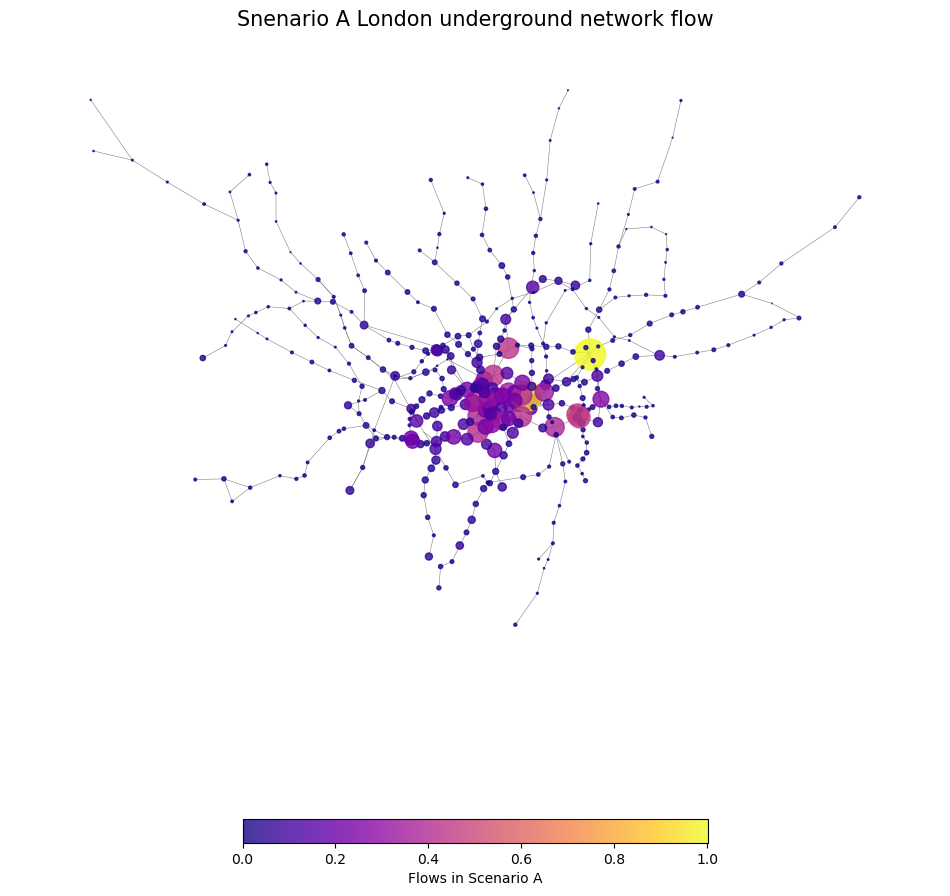

In [178]:
# Lets set colour and size of nodes according to betweenness values
flowA_values=[df[['flowA']]]
base = max(df['flowA'])-min(df['flowA'])

A_color = []
A_size = []
for i in df.index:
    A_color.append(df.loc[i,'flowA']/base)
    A_color = pd.Series(A_color).fillna(0).tolist()

    A_size.append((abs(df.loc[i,'flowA'])/base)*500)
    A_size = pd.Series(A_size).fillna(0).tolist()
    
# Plot graph
pos=pos
fig, ax = plt.subplots(figsize=(12,12))


# 自定义colormap
bottom_stack=round(256*(abs(min(df['flowA']))/base))
top_stack = 256-bottom_stack

bottom=cm.get_cmap('Blues_r', 256)
top=cm.get_cmap('Reds',256)

newcolors = np.vstack((bottom(np.linspace(0, 0.5, bottom_stack)),
                       top(np.linspace(0.5, 1, top_stack))))

newcmp = mpl.colors.ListedColormap(newcolors, name='RedBlue')

cm.register_cmap(cmap=newcmp)
cmap=mpl.cm.plasma



# Get selected label: only top5 and least5

#排序df[flowAc]
flowA_sort=df.fillna(0).sort_values(by=['flowA'], ascending = False)

# get the top5 & last5
top5 = flowA_sort.head(7).drop_duplicates().index.tolist()
last5 = flowA_sort.tail(7).drop_duplicates().index.tolist()

top5_labels={}
for node in G.nodes():
    if node in top5:
        #set the node name as the key and the label as its value 
        top5_labels[node] = df.loc[node,'station_name']
        
last5_labels={}
for node in G.nodes():
    if node in last5:
        #set the node name as the key and the label as its value 
        last5_labels[node] = df.loc[node,'station_name']

print('top5_labels:')
for k,v in top5_labels.items():
    print(v)
print()
print('last5_labels:')
for k,v in last5_labels.items():
    print(v)
        
# Plot
nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
                        pos = pos,
                        node_color= A_color,
                        node_size= A_size,
                        alpha = 0.8,
                        edgecolors = None,
                        cmap=cmap)
# Label top5
# nx.draw_networkx_labels(G,pos, top5_labels, font_size=10, font_color='k',verticalalignment='top')

# Label last5
# nx.draw_networkx_labels(G,pos, last5_labels, font_size=10, font_color='k',verticalalignment='top')



plt.colorbar(nod,label="Flows in Scenario A",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Snenario A London underground network flow",fontsize=15)
# plt.savefig('plot/SnAfl_last5.png')
plt.savefig('plot/SnAfl_top5.png')
plt.show()

## Plot A change 

In [179]:
# groupby flows to dest
flow_dest_0 = df_udg.groupby(by='Dest').sum()
flow_dest_0['flowAc'] = flow_dest_0['prodsimest4'] - flow_dest_0['flows'] #flow A changed
flow_dest_0

,flows,Oi1_pop,Dj2_job,distance,log_Oi1_pop,log_Dj2_job,log_distance,unconstrainedEst2,fitted,O_i,...,Ai_exp,Bj_exp,SIM_est_exp,distance1,log_distance1,SIM_est_exp1,distance2,log_distance2,SIM_est_exp2,flowAc
Dest,,,,,,,,,,,,,,,,,,,,,
Abbey Road,345,190997.0,11040.0,1.678493e+05,246.582464,186.993421,267.824439,222,222.938818,190958,...,0.001568,25.881222,344.0,3.356987e+05,290.005149,343.0,5.035480e+05,302.980032,346.0,125.0
Acton Central,750,266975.0,45750.0,8.757745e+05,455.568138,403.824466,573.147423,244,243.056580,266975,...,0.012332,228.481396,750.0,1.751549e+06,615.429401,750.0,2.627324e+06,640.162772,748.0,-357.0
Acton Town,2202,1264084.0,510864.0,3.817095e+06,1870.497555,1785.732146,2215.762079,2490,2487.476130,1264016,...,63.343820,122.263063,2204.0,7.634190e+06,2376.572225,2182.0,1.145129e+07,2470.640130,2193.0,-20.0
Aldgate,7782,1218365.0,1836552.0,3.308639e+06,1893.939925,2114.458202,2196.472050,9785,9786.147681,1218297,...,63.474066,389.451116,7777.0,6.617279e+06,2360.054785,7779.0,9.925918e+06,2455.744550,7779.0,1054.0
Aldgate East,7932,1284827.0,1998864.0,3.363580e+06,2019.255417,2262.622443,2339.798551,10329,10332.008468,1284759,...,58.951232,337.581627,7934.0,6.727160e+06,2514.471641,7936.0,1.009074e+07,2616.648848,7930.0,1466.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wood Street,404,181592.0,14948.0,4.567405e+05,279.650426,222.052350,342.327989,122,124.640200,181591,...,0.017801,9.573414,402.0,9.134810e+05,367.974434,401.0,1.370221e+06,382.976643,402.0,-62.0
Woodford,706,1165059.0,141200.0,4.388522e+06,1625.436193,1311.923047,1976.544078,803,805.296838,1164991,...,0.401819,19.963361,692.0,8.777044e+06,2115.173514,700.0,1.316557e+07,2196.266535,705.0,-40.0
Woodgrange Park,242,88821.0,8712.0,6.042029e+05,263.128976,197.601758,343.989541,42,43.339543,88821,...,0.017662,27.533548,242.0,1.208406e+06,368.942839,240.0,1.812609e+06,383.539583,241.0,-86.0


In [180]:
#获取G中的站名和编号
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))

# Merge df 和 flowAC
df = df.join(flow_dest_0,on='station_name',how='left')
# Bethnal Green is 重复的，因为一个是railway，一个是underground station 但是在flow里没有区分，所以删掉一个
#少了两个站可能因为Kensington 和 'Shepherd\'s Bush应该是有两个的，但是在flow里合成一个站了之类的

df = df[['station_name','flows','flowAc']]
df

,station_name,flows,flowAc
910GCAMHTH,Cambridge Heath,458.0,-132.0
910GBTHNLGR,Bethnal Green,4660.0,1878.0
910GLONFLDS,London Fields,790.0,-214.0
910GHAKNYNM,Hackney Downs,834.0,-294.0
910GRCTRYRD,Rectory Road,219.0,-11.0
...,...,...,...
940GZZLUMTC,Mornington Crescent,2927.0,1028.0
940GZZLUGDG,Goodge Street,6457.0,1315.0
910GKENOLYM,none,NaN,NaN
940GZZLUKOY,Kensington (Olympia),NaN,NaN


In [181]:
#把df作为attrs放进G
attrs = df[['flowAc']].T.to_dict()
nx.set_node_attributes(G,attrs)
G.nodes['910GCAMHTH']['flowAc']

-132.0

E:\ProgramFiles\Anaconda\envs\urbsim\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Trying to register the cmap 'RedBlue' which already exists.


top5_labels:
Highbury & Islington
Embankment
Whitechapel
Stratford
Canada Water

last5_labels:
Victoria
Oxford Circus
King's Cross St. Pancras
Hammersmith
Canary Wharf


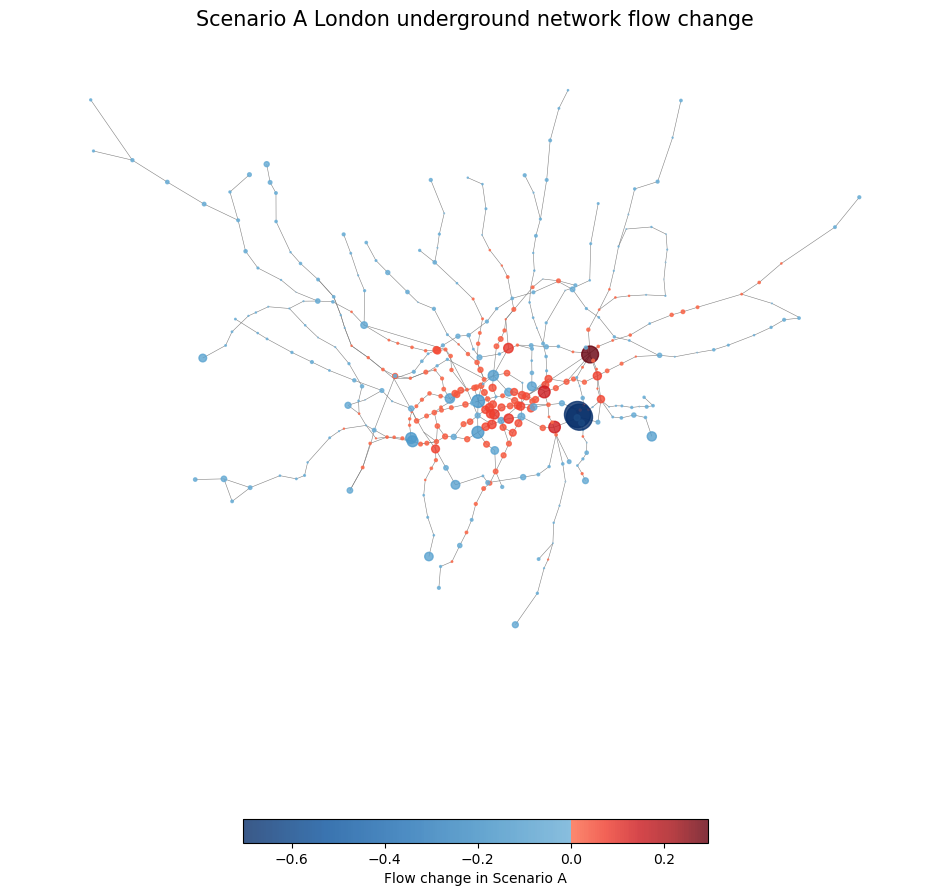

In [185]:
# Lets set colour and size of nodes according to betweenness values
flowAc_values=[df[['flowAc']]]
base = max(df['flowAc'])-min(df['flowAc'])

A_color = []
A_size = []
for i in df.index:
    A_color.append(df.loc[i,'flowAc']/base)
    A_color = pd.Series(A_color).fillna(0).tolist()

    A_size.append((abs(df.loc[i,'flowAc'])/base)*500)
    A_size = pd.Series(A_size).fillna(0).tolist()
    
# Plot graph
pos=pos
fig, ax = plt.subplots(figsize=(12,12))


# 自定义colormap
bottom_stack=round(256*(abs(min(df['flowAc']))/base))
top_stack = 256-bottom_stack

bottom=cm.get_cmap('Blues_r', 256)
top=cm.get_cmap('Reds',256)

newcolors = np.vstack((bottom(np.linspace(0, 0.5, bottom_stack)),
                       top(np.linspace(0.5, 1, top_stack))))

newcmp = mpl.colors.ListedColormap(newcolors, name='RedBlue')

cm.register_cmap(cmap=newcmp)




# Get selected label: only top5 and least5

#排序df[flowAc]
flowAc_sort=df.fillna(0).sort_values(by=['flowAc'], ascending = False)

# get the top5 & last5
top5 = flowAc_sort.head(5).index.tolist()
last5 = flowAc_sort.tail(7).drop_duplicates().index.tolist()

top5_labels={}
for node in G.nodes():
    if node in top5:
        #set the node name as the key and the label as its value 
        top5_labels[node] = df.loc[node,'station_name']
        
last5_labels={}
for node in G.nodes():
    if node in last5:
        #set the node name as the key and the label as its value 
        last5_labels[node] = df.loc[node,'station_name']

print('top5_labels:')
for k,v in top5_labels.items():
    print(v)
print()
print('last5_labels:')
for k,v in last5_labels.items():
    print(v)
        
# Plot
nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
                        pos = pos,
                        node_color= A_color,
                        node_size= A_size,
                        alpha = 0.8,
                        edgecolors = None,
                        cmap='RedBlue')
# Label top5
# nx.draw_networkx_labels(G,pos, top5_labels, font_size=10, font_color='darkred',verticalalignment='top')

# Label last5
# nx.draw_networkx_labels(G,pos, last5_labels, font_size=10, font_color='blue',verticalalignment='top')



plt.colorbar(nod,label="Flow change in Scenario A",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Scenario A London underground network flow change",fontsize=15)
# plt.savefig('plot/SnA_last5.png')
plt.savefig('plot/SnA_top5.png')
plt.show()

## Plot A change 2

In [223]:
#获取G中的站名和编号
df_G = pd.DataFrame(index=G.nodes())
df_G['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
##df要跟graph对应不能改，所以要改df_udg里的dest，orig name
df_G = df_G.reset_index()
# df_G

In [225]:
# 融合df和G，看一下差的有哪些
dfA = df_udg.merge(df_G, how='left',left_on='Orig',right_on='station_name').drop(columns=['station_name']).rename(columns={'index':'OrigCode'})

dfA = dfA.merge(df_G, how='left',left_on='Dest',right_on='station_name').drop(columns=['station_name']).rename(columns={'index':'DestCode'})

dfA.shape[0]

64204

In [226]:
#把dfB里的Bank and Monument 换成 Bank
# Kensington------------Kensington (Olympia)
dfA=dfA.replace('Bank and Monument','Bank')
dfA = dfA.replace('Kensington','Kensington (Olympia)')

#没有Battersea Park in G，用周边的Wandsworth Road 替代
dfA = dfA.replace('Battersea Park','Wandsworth Road')

dfB

#把原来merge的两列删掉
dfA = dfA.drop(['OrigCode','DestCode'],axis=1).drop_duplicates()

#重新merge一次
dfA = dfA.merge(df_G, how='left',left_on='Orig',right_on='station_name').drop(columns=['station_name']).rename(columns={'index':'OrigCode'})

dfA = dfA.merge(df_G, how='left',left_on='Dest',right_on='station_name').drop(columns=['station_name']).rename(columns={'index':'DestCode'})

dfA #有起终点代码啦！

,Orig,Dest,flows,Oi1_pop,Dj2_job,distance,log_Oi1_pop,log_Dj2_job,log_distance,unconstrainedEst2,...,Bj_exp,SIM_est_exp,distance1,log_distance1,SIM_est_exp1,distance2,log_distance2,SIM_est_exp2,OrigCode,DestCode
0,Abbey Road,Bank,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,50,...,1.122873,77.0,16263.050194,9.696651,52.0,24394.575291,10.102116,41.0,940GZZDLABR,940GZZLUBNK
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1,...,6.869382,3.0,17020.243548,9.742159,2.0,25530.365322,10.147624,1.0,940GZZDLABR,940GZZDLBEC
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,2,...,1.235130,4.0,7550.897744,8.929422,3.0,11326.346616,9.334887,3.0,940GZZDLABR,940GZZDLBLA
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53,...,0.986905,112.0,10173.028440,9.227495,113.0,15259.542660,9.632960,109.0,940GZZDLABR,940GZZDLCAN
4,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53,...,0.986905,112.0,10173.028440,9.227495,113.0,15259.542660,9.632960,109.0,940GZZDLABR,940GZZLUCYF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64199,Woolwich Arsenal,Tower Gateway,127,7892.0,3342.0,13401.795550,8.973605,8.114325,9.503144,22,...,4.381005,185.0,26803.591100,10.196291,120.0,40205.386650,10.601756,83.0,940GZZDLWLA,940GZZDLTWG
64200,Woolwich Arsenal,West Ham,608,7892.0,5487.0,8701.454361,8.973605,8.610137,9.071245,42,...,0.446304,176.0,17402.908722,9.764393,164.0,26104.363083,10.169858,122.0,940GZZDLWLA,940GZZLUWHM
64201,Woolwich Arsenal,West India Quay,6,7892.0,400.0,9536.720451,8.973605,5.991465,9.162905,5,...,1.252880,27.0,19073.440902,9.856052,21.0,28610.161353,10.261517,17.0,940GZZDLWLA,940GZZDLWIQ
64202,Woolwich Arsenal,West Silvertown,81,7892.0,893.0,5355.248554,8.973605,6.794587,8.585832,14,...,1.266888,132.0,10710.497108,9.278980,193.0,16065.745662,9.684445,265.0,940GZZDLWLA,940GZZDLWSV


In [229]:
# 获得flow变化 flowB1c
dfA['flowA1c'] = dfA['prodsimest4'] - dfA['flows']
dfA.head(5)

,Orig,Dest,flows,Oi1_pop,Dj2_job,distance,log_Oi1_pop,log_Dj2_job,log_distance,unconstrainedEst2,...,distance1,log_distance1,SIM_est_exp1,distance2,log_distance2,SIM_est_exp2,OrigCode,DestCode,flowB1c,flowA1c
0,Abbey Road,Bank,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,50,...,16263.050194,9.696651,52.0,24394.575291,10.102116,41.0,940GZZDLABR,940GZZLUBNK,58.0,58.0
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1,...,17020.243548,9.742159,2.0,25530.365322,10.147624,1.0,940GZZDLABR,940GZZDLBEC,0.0,0.0
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,2,...,7550.897744,8.929422,3.0,11326.346616,9.334887,3.0,940GZZDLABR,940GZZDLBLA,0.0,0.0
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53,...,10173.028440,9.227495,113.0,15259.542660,9.632960,109.0,940GZZDLABR,940GZZDLCAN,40.0,40.0
4,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53,...,10173.028440,9.227495,113.0,15259.542660,9.632960,109.0,940GZZDLABR,940GZZLUCYF,40.0,40.0


In [231]:
# Divide 一段起终点 into short path with 很多小段
dict_A = {}
for i in range(0,dfB.shape[0]):
    OC=dfA.at[i,'OrigCode']
    DC=dfA.at[i,'DestCode']
    path = nx.shortest_path(G,OC,DC)
# path = nx.shortest_path(G,'940GZZDLABR','940GZZLUBNK')

#给这些小段赋值为flowB1C
    #创建一个dict，key为元组（）：flowB1c
    for n in range(0,len(path)-1):
        flow = dfA.at[i,'flowA1c']
        if (path[n],path[n+1]) in dict_A == True:
            dict_A[(path[n],path[n+1])] = dict_A[(path[n],path[n+1])] + flow
        else:
            dict_A[(path[n],path[n+1])] = flow
len(dict_A)

958

In [233]:
#dict_B 和G不齐，dict_B缺的话G有边没属性，所以要加上0

l=[]
for u,d,v in G.edges(data=True):
    a = (u,d)
    m = a in dict_A
    if m ==False:
        l.append((u,d))

for i in range(0,len(l)):
    dict_A[l[i]]=0

len(dict_A)

965

In [235]:
# set dict_B as edge_attributes
nx.set_edge_attributes(G,dict_A,'flowA1c')

top3:
London Bridge, Borough 220.0
Borough, Elephant & Castle 220.0
Tower Hill, Aldgate 136.0
Bethnal Green, Bethnal Green 120.0
Brentwood, Shenfield 64.0
last3:
Bank, Bank (DLR) -895.0
Bank (DLR), Shadwell -895.0
London Bridge, Bermondsey -698.0
Temple, Blackfriars -509.0
West Ham, Canning Town -328.0


E:\ProgramFiles\Anaconda\envs\urbsim\lib\site-packages\ipykernel_launcher.py:59: UserWarning: Trying to register the cmap 'RedBlue' which already exists.


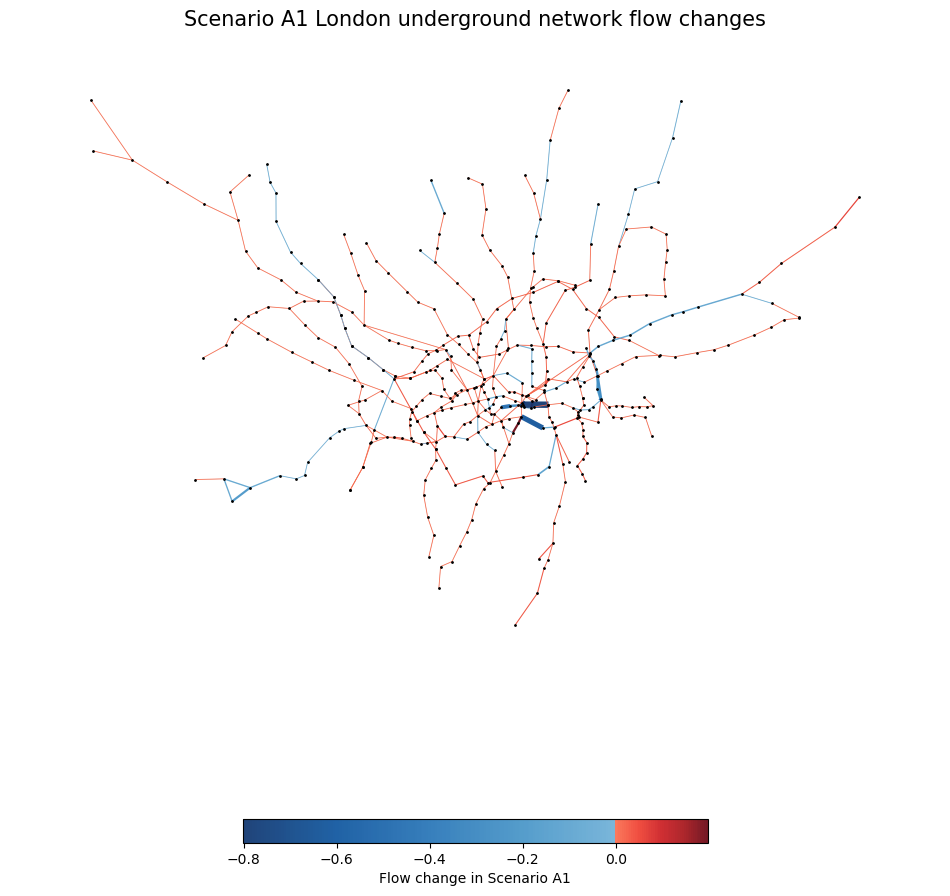

In [238]:
#Plot 
# flowB1c_values = [dfB[['flowB1c']]]
base = max(dict_A.values())-min(dict_A.values())

A1_color = []
A1_width = []
for u,d,v in G.edges(data=True):
        A1 = nx.get_edge_attributes(G,'flowA1c')
        A1_color.append(A1[(u,d)]/base)
        A1_color = pd.Series(A1_color).fillna(0).tolist()
        
        A1_width.append(0.6+(abs(A1[(u,d)])/base)*5)
        A1_width = pd.Series(A1_width).fillna(0).tolist()

# Get selected label: only top5 and least5

#排序df[flowB1c] 
flowA1c = nx.get_edge_attributes(G,'flowA1c') #get attribute
d = col.Counter(flowA1c) #排序
# d.most_common()

print('top3:')
top3 = {}
for k,v in d.most_common(5):
    top3[k]=str(nx.get_edge_attributes(G,'station_1_')[k] +', ' + nx.get_edge_attributes(G,'station_2_')[k])
    print(top3[k] + " " + str(nx.get_edge_attributes(G,'flowA1c')[k]))

    
print('last3:')    
last3 = {}
la = sorted(dict.items(flowB1c),key=lambda x:x[1])[:5]
for k,v in la:
    last3[k]= str(nx.get_edge_attributes(G,'station_1_')[k] +', ' + nx.get_edge_attributes(G,'station_2_')[k])
    print(last3[k] + " " + str(nx.get_edge_attributes(G,'flowA1c')[k]))
    
# print('top3:')
# for k,v in top3.items():
#     print(v + str(flowB1c[(v)]))
# print()
# print('last3:')
# for k,v in last3.items():
#     print(v+ str(flowB1c[(v)]))
    
    
# Plot graph
pos=pos
fig, ax = plt.subplots(figsize=(12,12))

# 自定义colormap
bottom_stack=round(256*(abs(min(dict_A.values()))/base))
top_stack = 256-bottom_stack

bottom=cm.get_cmap('Blues_r', 256)
top=cm.get_cmap('Reds',256)

newcolors = np.vstack((bottom(np.linspace(0, 0.5, bottom_stack)),
                       top(np.linspace(0.5, 1, top_stack))))
newcmp = mpl.colors.ListedColormap(newcolors, name='RedBlue')
cm.register_cmap(cmap=newcmp)


# Plot
nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.2,alpha=0.5)
edg = nx.draw_networkx_edges(G, pos,edge_color=A1_color,
                             width=A1_width,edge_cmap=newcmp,alpha =0.9)#
nx.draw_networkx_nodes(G,
                        pos = pos,
                        node_color= 'black',
                        node_size= 1)
# Label top3
# nx.draw_networkx_edge_labels(G,pos, edge_labels = top3, font_size=5.5, font_color='darkred',
#                              horizontalalignment='left', rotate = False, label_pos = 0)

# Label last3
# nx.draw_networkx_edge_labels(G,pos, edge_labels = last3, font_size=10, font_color='blue',
#                              horizontalalignment='left', rotate = False, label_pos = 0.5)

plt.colorbar(edg,label="Flow change in Scenario A1",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Scenario A1 London underground network flow changes",fontsize=15)
# plt.savefig('plot/SnB1_last3.png')
plt.savefig('plot/SnA1.png')
plt.show()


E:\ProgramFiles\Anaconda\envs\urbsim\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Trying to register the cmap 'RedBlue' which already exists.


top5_labels:
Highbury & Islington
Embankment
Whitechapel
Stratford
Canada Water

last5_labels:
Victoria
Oxford Circus
King's Cross St. Pancras
Hammersmith
Canary Wharf


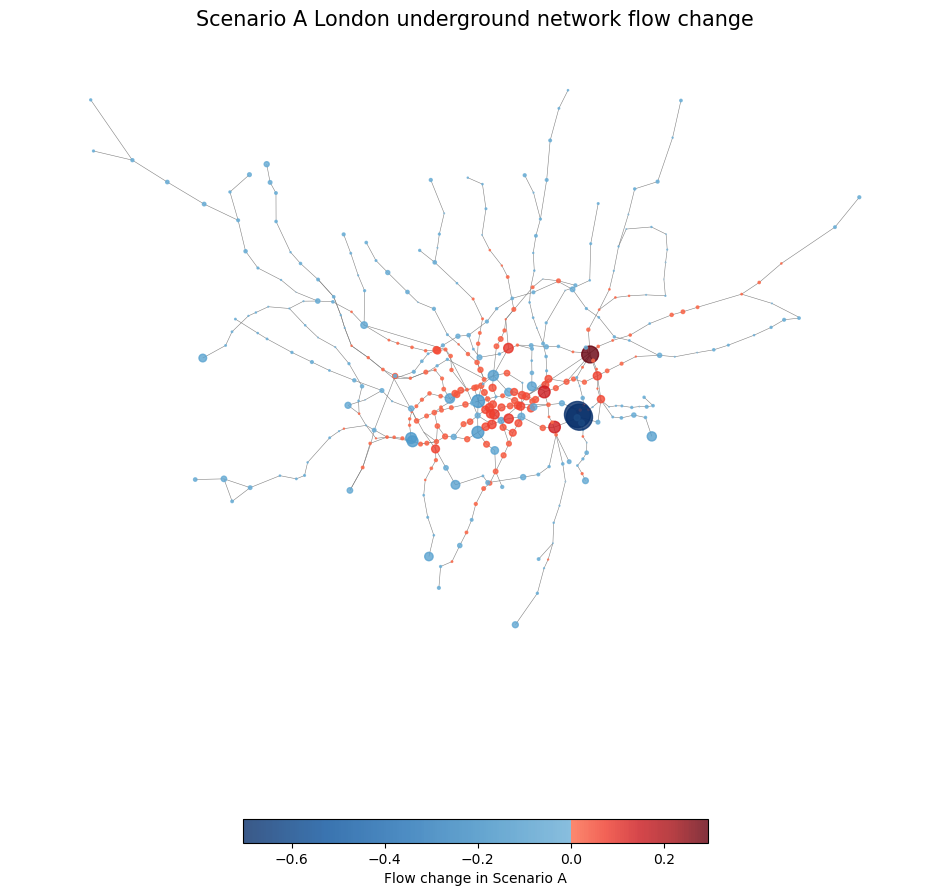

In [185]:
# Lets set colour and size of nodes according to betweenness values
flowAc_values=[df[['flowAc']]]
base = max(df['flowAc'])-min(df['flowAc'])

A_color = []
A_size = []
for i in df.index:
    A_color.append(df.loc[i,'flowAc']/base)
    A_color = pd.Series(A_color).fillna(0).tolist()

    A_size.append((abs(df.loc[i,'flowAc'])/base)*500)
    A_size = pd.Series(A_size).fillna(0).tolist()
    
# Plot graph
pos=pos
fig, ax = plt.subplots(figsize=(12,12))


# 自定义colormap
bottom_stack=round(256*(abs(min(df['flowAc']))/base))
top_stack = 256-bottom_stack

bottom=cm.get_cmap('Blues_r', 256)
top=cm.get_cmap('Reds',256)

newcolors = np.vstack((bottom(np.linspace(0, 0.5, bottom_stack)),
                       top(np.linspace(0.5, 1, top_stack))))

newcmp = mpl.colors.ListedColormap(newcolors, name='RedBlue')

cm.register_cmap(cmap=newcmp)




# Get selected label: only top5 and least5

#排序df[flowAc]
flowAc_sort=df.fillna(0).sort_values(by=['flowAc'], ascending = False)

# get the top5 & last5
top5 = flowAc_sort.head(5).index.tolist()
last5 = flowAc_sort.tail(7).drop_duplicates().index.tolist()

top5_labels={}
for node in G.nodes():
    if node in top5:
        #set the node name as the key and the label as its value 
        top5_labels[node] = df.loc[node,'station_name']
        
last5_labels={}
for node in G.nodes():
    if node in last5:
        #set the node name as the key and the label as its value 
        last5_labels[node] = df.loc[node,'station_name']

print('top5_labels:')
for k,v in top5_labels.items():
    print(v)
print()
print('last5_labels:')
for k,v in last5_labels.items():
    print(v)
        
# Plot
nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
                        pos = pos,
                        node_color= A_color,
                        node_size= A_size,
                        alpha = 0.8,
                        edgecolors = None,
                        cmap='RedBlue')
# Label top5
# nx.draw_networkx_labels(G,pos, top5_labels, font_size=10, font_color='darkred',verticalalignment='top')

# Label last5
# nx.draw_networkx_labels(G,pos, last5_labels, font_size=10, font_color='blue',verticalalignment='top')



plt.colorbar(nod,label="Flow change in Scenario A",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Scenario A London underground network flow change",fontsize=15)
# plt.savefig('plot/SnA_last5.png')
plt.savefig('plot/SnA_top5.png')
plt.show()

,station_name,flows,flowAc
940GZZLUKSX,King's Cross St. Pancras,33330.0,-4201.0
940GZZLUHSC,Hammersmith,18250.0,-4708.0
940GZZLUHSD,Hammersmith,18250.0,-4708.0
940GZZLUVIC,Victoria,33251.0,-5668.0
940GZZLUOXC,Oxford Circus,44368.0,-6427.0
940GZZDLCAN,Canary Wharf,58772.0,-27466.0
940GZZLUCYF,Canary Wharf,58772.0,-27466.0


# Scenario B 

## double constrained model 

In [54]:
#create the formula (the "-1" indicates no intercept in the regression model).
dbl_form = 'flows ~ Dest + Orig + log_distance-1'
#run a doubly constrained sim
doubSim = smf.glm(formula = dbl_form, data=df_udg, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(doubSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    60658
Model Family:                 Poisson   Df Model:                          797
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.7074e+05
Date:                Tue, 03 May 2022   Deviance:                   1.7693e+06
Time:                        03:17:29   Pearson chi2:                 2.47e+06
No. Iterations:                    27   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
De

And the various flows and goodness-of-fit statistics?
### Invers power estimate

In [55]:
#get the estimates
df_udg["doubsimfitted"] = np.round(doubSim.mu)
#here's the matrix
submat_udgSnB_db = df_udg.pivot_table(values ="doubsimfitted", index="Orig", columns = "Dest",
                                    aggfunc=np.sum, margins=True)
submat_udgSnB_db

Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,600.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1224.0
Acton Town,NaN,NaN,NaN,15.0,15.0,NaN,11.0,1.0,NaN,17.0,...,30.0,3.0,5.0,12.0,NaN,2.0,NaN,2.0,NaN,3747.0
Aldgate,NaN,NaN,2.0,NaN,42.0,NaN,NaN,0.0,NaN,19.0,...,7.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2873.0
Aldgate East,NaN,NaN,2.0,49.0,NaN,NaN,1.0,0.0,NaN,21.0,...,8.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,31.0,33.0,NaN,NaN,NaN,NaN,29.0,...,29.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4862.0
Woodgrange Park,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside Park,NaN,NaN,5.0,18.0,17.0,NaN,3.0,NaN,NaN,22.0,...,21.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3093.0


In [56]:
submat_udg

Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [57]:
CalcRSquared(df_udg["flows"],df_udg["doubsimfitted"])

0.40770034724103543

In [58]:
CalcRMSE(df_udg["flows"],df_udg["doubsimfitted"])

101.3

### Negative exponential estimate

In [59]:
# Run a doubly constrained SIM with a negative exponential cost function.
doubsim_form = "flows ~ Orig + Dest + distance -1"
doubsim1 = smf.glm(formula=doubsim_form, data = df_udg, family = sm.families.Poisson()).fit()
print(doubsim1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    60658
Model Family:                 Poisson   Df Model:                          797
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.5105e+05
Date:                Tue, 03 May 2022   Deviance:                   1.5299e+06
Time:                        03:21:21   Pearson chi2:                 2.02e+06
No. Iterations:                    27   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Or

In [60]:
#get the estimates
df_udg["doubsimfitted2"] = np.round(doubsim1.mu)
#here's the matrix
submat_udgSnB_db2 = df_udg.pivot_table(values ="doubsimfitted2", index="Orig", columns = "Dest",
                                    aggfunc=np.sum, margins=True)
submat_udgSnB_db2

Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,603.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1221.0
Acton Town,NaN,NaN,NaN,11.0,10.0,NaN,17.0,0.0,NaN,12.0,...,40.0,4.0,2.0,19.0,NaN,0.0,NaN,1.0,NaN,3752.0
Aldgate,NaN,NaN,1.0,NaN,32.0,NaN,NaN,0.0,NaN,23.0,...,7.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2883.0
Aldgate East,NaN,NaN,2.0,38.0,NaN,NaN,0.0,0.0,NaN,24.0,...,7.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,38.0,44.0,NaN,NaN,NaN,NaN,25.0,...,7.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,4862.0
Woodgrange Park,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,528.0
Woodside Park,NaN,NaN,2.0,17.0,15.0,NaN,0.0,NaN,NaN,25.0,...,10.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3093.0


In [61]:
CalcRSquared(df_udg["flows"],df_udg["doubsimfitted2"])

0.4978554141117547

In [62]:
CalcRMSE(df_udg["flows"],df_udg["doubsimfitted2"])

93.368

Negative exponential estimate preform better

### Flows calculation

In [63]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i_db = pd.DataFrame(df_udg.groupby(["Orig"])["flows"].agg(np.sum))
O_i_db.rename(columns={"flows":"O_i_db"}, inplace = True)
df_udg = df_udg.merge(O_i_db, on = "Orig", how = "left" )

D_j_db = pd.DataFrame(df_udg.groupby(["Dest"])["flows"].agg(np.sum))
D_j_db.rename(columns={"flows":"D_j_db"}, inplace = True)
df_udg = df_udg.merge(D_j_db, on = "Dest", how = "left" )

In [64]:
# Here is the entropy maximising approach for a known beta.
# Plug in the required values in this function to solve.

def balance_doubly_constrained(pd, orig_field, dest_field, Oi_field, Dj_field, cij_field, beta, 
                               cost_function, Ai_name = "Ai_new", Bj_name = "Bj_new", converge=0.001):
    # Define some variables
    Oi = pd[[orig_field, Oi_field]]
    Dj = pd[[dest_field,Dj_field]]    
    if cost_function.lower() in ['power','pow']:
        beta_cij = np.exp(beta * np.log(pd[cij_field]))
    elif cost_function.lower() in ['exponential','exp']:
        beta_cij = np.exp(beta * pd[cij_field])
    else:
        return "Cost function not specified properly, use 'exp' or 'pow'"
    
    # Create some helper variables
    cnvg = 1
    iteration = 0
    # Now iteratively rebalance the Ai and Bj terms until convergence
    while cnvg > converge:
        if iteration == 0:
            # This first condition sets starting values for Ai and Bj
            # NB sets starting value of Ai assuming Bj is a vector of 1s.
            # We've already established beta_cij with the appropriate cost function, so...
            Oi = Oi.assign(Ai = Dj[Dj_field] * beta_cij)
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Now set up Bjs using starting values of Ai
            Dj = Dj.assign(Bj = Oi['Ai_old'] * Oi[Oi_field] * beta_cij)
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Increment loop
            iteration += 1
        else:
            # This bit is the iterated bit of the loop which refines the values of Ai and Bj
            # First Ai
            Oi['Ai'] = Dj['Bj_old'] * Dj[Dj_field] * beta_cij
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Drop temporary Ai
            Oi.drop('Ai', axis=1, inplace=True)
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True)
            # Calculate the difference between old and new Ais
            Oi['diff'] = np.absolute((Oi['Ai_old'] - Oi['Ai'])/Oi['Ai_old'])
            # Set new Ais to Ai_old
            Oi['Ai_old'] = Oi['Ai']
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Then Bj
            Dj['Bj'] = Oi['Ai_old'] * Oi[Oi_field] * beta_cij
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Drop temporary Bj
            Dj.drop('Bj', axis=1, inplace=True)
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True)
            # Calculate the difference between old and new Bjs
            Dj['diff'] = np.absolute((Dj['Bj_old'] - Dj['Bj'])/Dj['Bj_old'])
            # Set new Bjs to Bj_old
            Dj['Bj_old'] = Dj['Bj']
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Assign higher sum difference from Ai or Bj to cnvg
            cnvg = np.maximum(Oi['diff'].sum(),Dj['diff'].sum())
            
            # Print and increment loop
            print("Iteration:", iteration)
            iteration += 1

    # When the while loop finishes add the computed Ai_old and Bj_old to the dataframe and return
    pd[Ai_name] = Oi['Ai_old']
    pd[Bj_name] = Dj['Bj_old']
    return pd

#### Invers power Flows

In [65]:
# Use the beta we got from the inverse power model
beta = -doubSim.params[-1]
# Get the balancing factors.
df_udg = balance_doubly_constrained(df_udg,'Orig','Dest','O_i_db','D_j_db','distance',-beta,'power')

# Now predict the model again using the new Ai and Dj fields.
df_udg['SIM_est_pow'] = np.round(df_udg['O_i_db'] * df_udg['Ai_new'] * df_udg['D_j_db'] * df_udg['Bj_new'] * 
                                   np.exp(np.log(df_udg['distance'])*-beta))
# Check out the matrix
pd.pivot_table(df_udg,values='SIM_est_pow',index ='Orig',columns='Dest',fill_value=0,aggfunc=sum,margins=True)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22


Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,26,600.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1224.0
Acton Town,0,0,0,15,15,0,11,1,0,17,...,30,3,5,12,0,2,0,2,0,3747.0
Aldgate,0,0,2,0,42,0,0,0,0,19,...,7,0,2,2,0,1,0,1,0,2873.0
Aldgate East,0,0,2,49,0,0,1,0,0,21,...,8,1,3,2,0,1,0,1,0,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,7,31,33,0,0,0,0,29,...,29,0,10,0,0,0,0,0,0,4862.0
Woodgrange Park,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,530.0
Woodside Park,0,0,5,18,17,0,3,0,0,22,...,21,0,6,0,0,0,0,0,0,3093.0


#### Negative exponential Flows

In [66]:
# Use the beta we got from the negative exponential model
beta = -doubsim1.params[-1]
beta

0.00015436969215712205

In [67]:
# Get the balancing factors. NB Setting of new field names for Ai and Bj.
df_udg = balance_doubly_constrained(df_udg,'Orig','Dest','O_i_db','D_j_db','distance',-beta,'exponential','Ai_exp','Bj_exp')

# Now predict the model again using the new Ai and Dj fields.
df_udg['SIM_est_exp'] = np.round(df_udg['O_i_db'] * df_udg['Ai_exp'] * df_udg['D_j_db'] * df_udg['Bj_exp'] * 
                                   np.exp(df_udg['distance']*-beta))
# Check out the matrix
pd.pivot_table(df_udg,values='SIM_est_exp',index ='Orig',columns='Dest',fill_value=0,aggfunc=sum,margins=True)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23


Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,31,603.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1221.0
Acton Town,0,0,0,11,10,0,17,0,0,12,...,40,4,2,19,0,0,0,1,0,3752.0
Aldgate,0,0,1,0,32,0,0,0,0,23,...,7,0,3,2,0,1,0,1,0,2883.0
Aldgate East,0,0,2,38,0,0,0,0,0,24,...,7,1,3,2,0,1,0,1,0,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,2,38,44,0,0,0,0,25,...,7,0,7,0,0,0,0,0,0,4862.0
Woodgrange Park,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,528.0
Woodside Park,0,0,2,17,15,0,0,0,0,25,...,10,0,4,0,0,0,0,0,0,3093.0


## ScnB1:double distance

In [68]:
# Double distance
df_udg['distance1']=df_udg['distance']*2
df_udg['log_distance1']=np.log(df_udg['distance1'])

In [69]:
# Use the beta we got from the negative exponential model
beta = -doubsim1.params[-1]

# Get the balancing factors. NB Setting of new field names for Ai and Bj.
df_udg = balance_doubly_constrained(df_udg,'Orig','Dest','O_i_db','D_j_db','distance1',-beta,'exponential','Ai_exp','Bj_exp')

# Now predict the model again using the new Ai and Dj fields.
df_udg['SIM_est_exp1'] = np.round(df_udg['O_i_db'] * df_udg['Ai_exp'] * df_udg['D_j_db'] * df_udg['Bj_exp'] * 
                                   np.exp(df_udg['distance1']*-beta))
# Check out the matrix
pd.pivot_table(df_udg,values='SIM_est_exp1',index ='Orig',columns='Dest',fill_value=0,aggfunc=sum,margins=True)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48


Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,22,602.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1220.0
Acton Town,0,0,0,4,3,0,13,0,0,5,...,28,1,0,32,0,0,0,0,0,3749.0
Aldgate,0,0,0,0,48,0,0,0,0,27,...,1,0,1,1,0,0,0,0,0,2881.0
Aldgate East,0,0,0,60,0,0,0,0,0,28,...,1,0,1,1,0,0,0,0,0,3163.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,0,38,52,0,0,0,0,18,...,1,0,2,0,0,0,0,0,0,4861.0
Woodgrange Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,526.0
Woodside Park,0,0,0,10,8,0,0,0,0,25,...,2,0,1,0,0,0,0,0,0,3089.0


### Plot B1 flow
#### 匹配起终点code

In [163]:
#获取G中的站名和编号
df_G = pd.DataFrame(index=G.nodes())
df_G['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
##df要跟graph对应不能改，所以要改df_udg里的dest，orig name
df_G = df_G.reset_index()
# df_G

In [164]:
# 融合df和G，看一下差的有哪些
dfB = df_udg.merge(df_G, how='left',left_on='Orig',right_on='station_name').drop(columns=['station_name']).rename(columns={'index':'OrigCode'})

dfB = dfB.merge(df_G, how='left',left_on='Dest',right_on='station_name').drop(columns=['station_name']).rename(columns={'index':'DestCode'})

dfB.shape[0]

64204

In [165]:
#把dfB里的Bank and Monument 换成 Bank
# Kensington------------Kensington (Olympia)
dfB=dfB.replace('Bank and Monument','Bank')
dfB = dfB.replace('Kensington','Kensington (Olympia)')

#没有Battersea Park in G，用周边的Wandsworth Road 替代
dfB = dfB.replace('Battersea Park','Wandsworth Road')

#把原来merge的两列删掉
dfB = dfB.drop(['OrigCode','DestCode'],axis=1).drop_duplicates()

#重新merge一次
dfB = dfB.merge(df_G, how='left',left_on='Orig',right_on='station_name').drop(columns=['station_name']).rename(columns={'index':'OrigCode'})
dfB = dfB.merge(df_G, how='left',left_on='Dest',right_on='station_name').drop(columns=['station_name']).rename(columns={'index':'DestCode'})

dfB #有起终点代码啦！

,Orig,Dest,flows,Oi1_pop,Dj2_job,distance,log_Oi1_pop,log_Dj2_job,log_distance,unconstrainedEst2,...,Bj_exp,SIM_est_exp,distance1,log_distance1,SIM_est_exp1,distance2,log_distance2,SIM_est_exp2,OrigCode,DestCode
0,Abbey Road,Bank,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,50,...,1.122873,77.0,16263.050194,9.696651,52.0,24394.575291,10.102116,41.0,940GZZDLABR,940GZZLUBNK
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1,...,6.869382,3.0,17020.243548,9.742159,2.0,25530.365322,10.147624,1.0,940GZZDLABR,940GZZDLBEC
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,2,...,1.235130,4.0,7550.897744,8.929422,3.0,11326.346616,9.334887,3.0,940GZZDLABR,940GZZDLBLA
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53,...,0.986905,112.0,10173.028440,9.227495,113.0,15259.542660,9.632960,109.0,940GZZDLABR,940GZZDLCAN
4,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53,...,0.986905,112.0,10173.028440,9.227495,113.0,15259.542660,9.632960,109.0,940GZZDLABR,940GZZLUCYF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64199,Woolwich Arsenal,Tower Gateway,127,7892.0,3342.0,13401.795550,8.973605,8.114325,9.503144,22,...,4.381005,185.0,26803.591100,10.196291,120.0,40205.386650,10.601756,83.0,940GZZDLWLA,940GZZDLTWG
64200,Woolwich Arsenal,West Ham,608,7892.0,5487.0,8701.454361,8.973605,8.610137,9.071245,42,...,0.446304,176.0,17402.908722,9.764393,164.0,26104.363083,10.169858,122.0,940GZZDLWLA,940GZZLUWHM
64201,Woolwich Arsenal,West India Quay,6,7892.0,400.0,9536.720451,8.973605,5.991465,9.162905,5,...,1.252880,27.0,19073.440902,9.856052,21.0,28610.161353,10.261517,17.0,940GZZDLWLA,940GZZDLWIQ
64202,Woolwich Arsenal,West Silvertown,81,7892.0,893.0,5355.248554,8.973605,6.794587,8.585832,14,...,1.266888,132.0,10710.497108,9.278980,193.0,16065.745662,9.684445,265.0,940GZZDLWLA,940GZZDLWSV


#### 把flow变化赋值到edge上

In [166]:
# 获得flow变化 flowB1c
dfB['flowB1'] = dfB['SIM_est_exp1']
dfB.head(5)

,Orig,Dest,flows,Oi1_pop,Dj2_job,distance,log_Oi1_pop,log_Dj2_job,log_distance,unconstrainedEst2,...,SIM_est_exp,distance1,log_distance1,SIM_est_exp1,distance2,log_distance2,SIM_est_exp2,OrigCode,DestCode,flowB1
0,Abbey Road,Bank,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,50,...,77.0,16263.050194,9.696651,52.0,24394.575291,10.102116,41.0,940GZZDLABR,940GZZLUBNK,52.0
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1,...,3.0,17020.243548,9.742159,2.0,25530.365322,10.147624,1.0,940GZZDLABR,940GZZDLBEC,2.0
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,2,...,4.0,7550.897744,8.929422,3.0,11326.346616,9.334887,3.0,940GZZDLABR,940GZZDLBLA,3.0
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53,...,112.0,10173.028440,9.227495,113.0,15259.542660,9.632960,109.0,940GZZDLABR,940GZZDLCAN,113.0
4,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53,...,112.0,10173.028440,9.227495,113.0,15259.542660,9.632960,109.0,940GZZDLABR,940GZZLUCYF,113.0


In [167]:
# Divide 一段起终点 into short path with 很多小段
dict_B = {}
for i in range(0,dfB.shape[0]):
    OC=dfB.at[i,'OrigCode']
    DC=dfB.at[i,'DestCode']
    path = nx.shortest_path(G,OC,DC)
# path = nx.shortest_path(G,'940GZZDLABR','940GZZLUBNK')

#给这些小段赋值为flowB1
    #创建一个dict，key为元组（）：flowB1
    for n in range(0,len(path)-1):
        flow = dfB.at[i,'flowB1']
        if (path[n],path[n+1]) in dict_B == True :
            dict_B[(path[n],path[n+1])] = dict_B[(path[n],path[n+1])] + flow
        else:
            dict_B[(path[n],path[n+1])] = flow
len(dict_B)


#plot被赋予的值

958

In [168]:
#dict_B 和G不齐，dict_B缺的话G有边没属性，所以要加上0

l=[]
for u,d,v in G.edges(data=True):
    a = (u,d)
    m = a in dict_B
    if m ==False:
        l.append((u,d))

for i in range(0,len(l)):
    dict_B[l[i]]=0

len(dict_B)


965

#### Plot B1 Flow 

In [169]:
# set dict_B as edge_attributes
nx.set_edge_attributes(G,dict_B,'flowB1')

top3:
London Bridge, Borough
Borough, Elephant & Castle
Bank, Bank (DLR)

last3:
Theobalds Grove, Cheshunt
Romford, Gidea Park
Emerson Park, Upminster (Rail)


E:\ProgramFiles\Anaconda\envs\urbsim\lib\site-packages\ipykernel_launcher.py:53: UserWarning: Trying to register the cmap 'RedBlue' which already exists.


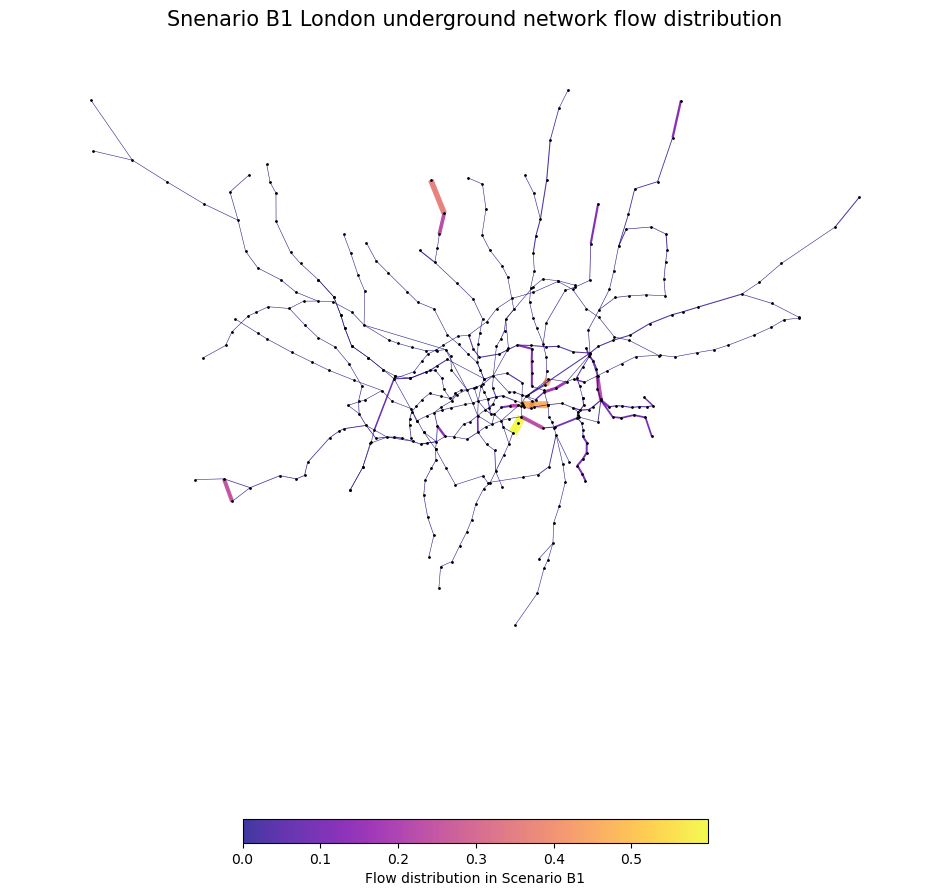

In [170]:
#Plot 
base = max(dict_B.values())-min(dict_B.values())

B1_color = []
B1_width = []
for u,d,v in G.edges(data=True):
        B1 = nx.get_edge_attributes(G,'flowB1')
        B1_color.append(B1[(u,d)]/base)
        B1_color = pd.Series(B1_color).fillna(0).tolist()
        
        B1_width.append(0.4+(abs(B1[(u,d)])/base)*10)
        B1_width = pd.Series(B1_width).fillna(0).tolist()

# Get selected label: only top5 and least5

#排序df[flowB1] 
flowB1 = nx.get_edge_attributes(G,'flowB1') #get attribute
d = col.Counter(flowB1) #排序
# d.most_common()

top3 = {}
for k,v in d.most_common(3):
    top3[k]=str(nx.get_edge_attributes(G,'station_1_')[k] +', ' + nx.get_edge_attributes(G,'station_2_')[k])

last3 = {}
la = sorted(dict.items(flowB1),key=lambda x:x[1])[:3]
for k,v in la:
    last3[k]= str(nx.get_edge_attributes(G,'station_1_')[k] +', ' + nx.get_edge_attributes(G,'station_2_')[k])

print('top3:')
for k,v in top3.items():
    print(v)
print()
print('last3:')
for k,v in last3.items():
    print(v)
    
    
# Plot graph
pos=pos
fig, ax = plt.subplots(figsize=(12,12))

# 自定义colormap
bottom_stack=round(256*(abs(min(dict_B.values()))/base))
top_stack = 256-bottom_stack

bottom=cm.get_cmap('Blues_r', 256)
top=cm.get_cmap('Reds',256)

newcolors = np.vstack((bottom(np.linspace(0, 0.5, bottom_stack)),
                       top(np.linspace(0.5, 1, top_stack))))
newcmp = mpl.colors.ListedColormap(newcolors, name='RedBlue')
cm.register_cmap(cmap=newcmp)
cmap=mpl.cm.plasma


# Plot
nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.2,alpha=0.5)
edg = nx.draw_networkx_edges(G, pos,edge_color=B1_color,
                             width=B1_width,edge_cmap=cmap,alpha =0.8)#
nx.draw_networkx_nodes(G,
                        pos = pos,
                        node_color= 'black',
                        node_size= 1)
# Label top3
# nx.draw_networkx_edge_labels(G,pos, edge_labels = top3, font_size=5.5, font_color='k',
#                              horizontalalignment='left', rotate = False, label_pos = 0)

# Label last3
# nx.draw_networkx_edge_labels(G,pos, edge_labels = last3, font_size=10, font_color='blue',
#                              horizontalalignment='left', rotate = False, label_pos = 0.5)

plt.colorbar(edg,label="Flow distribution in Scenario B1",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Snenario B1 London underground network flow distribution",fontsize=15)
# plt.savefig('plot/SnB1_last3.png')
plt.savefig('plot/SnB1_top3.png')
plt.show()


### Plot B1 change
#### 匹配起终点code

In [192]:
#获取G中的站名和编号
df_G = pd.DataFrame(index=G.nodes())
df_G['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
##df要跟graph对应不能改，所以要改df_udg里的dest，orig name
df_G = df_G.reset_index()
# df_G

In [193]:
# 融合df和G，看一下差的有哪些
dfB = df_udg.merge(df_G, how='left',left_on='Orig',right_on='station_name').drop(columns=['station_name']).rename(columns={'index':'OrigCode'})

dfB = dfB.merge(df_G, how='left',left_on='Dest',right_on='station_name').drop(columns=['station_name']).rename(columns={'index':'DestCode'})

dfB.shape[0]

64204

In [194]:
# OrigCode 和DestCode 有NA，总结一下有哪些
Nanstation = dfB[dfB.isnull().values==True]
Nanstation = Nanstation['Dest'].to_frame().value_counts().to_frame()
Nanstation.reset_index().head(10)

,Dest,0
0,Bank and Monument,309
1,Kensington,156
2,Battersea Park,20
3,Edgware Road,4
4,West Hampstead,4
5,Bethnal Green,4
6,Hammersmith,4
7,Canary Wharf,4
8,Whitechapel,3
9,Canada Water,3


In [195]:
#找一下df_G有没有相似名，用来替换
likename=df_G[df_G['station_name'].str.contains('Wandsworth')]
# es = detail[['amounts', 'counts']].corr(method='kendall')
likename

,index,station_name
361,910GWNDSWRD,Wandsworth Road


In [197]:
#把dfB里的Bank and Monument 换成 Bank
# Kensington------------Kensington (Olympia)
dfB=dfB.replace('Bank and Monument','Bank')
dfB = dfB.replace('Kensington','Kensington (Olympia)')

#没有Battersea Park in G，用周边的Wandsworth Road 替代
dfB = dfB.replace('Battersea Park','Wandsworth Road')

dfB

#把原来merge的两列删掉
dfB = dfB.drop(['OrigCode','DestCode'],axis=1).drop_duplicates()

#重新merge一次
dfB = dfB.merge(df_G, how='left',left_on='Orig',right_on='station_name').drop(columns=['station_name']).rename(columns={'index':'OrigCode'})

dfB = dfB.merge(df_G, how='left',left_on='Dest',right_on='station_name').drop(columns=['station_name']).rename(columns={'index':'DestCode'})

dfB #有起终点代码啦！

,Orig,Dest,flows,Oi1_pop,Dj2_job,distance,log_Oi1_pop,log_Dj2_job,log_distance,unconstrainedEst2,...,Bj_exp,SIM_est_exp,distance1,log_distance1,SIM_est_exp1,distance2,log_distance2,SIM_est_exp2,OrigCode,DestCode
0,Abbey Road,Bank,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,50,...,1.122873,77.0,16263.050194,9.696651,52.0,24394.575291,10.102116,41.0,940GZZDLABR,940GZZLUBNK
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1,...,6.869382,3.0,17020.243548,9.742159,2.0,25530.365322,10.147624,1.0,940GZZDLABR,940GZZDLBEC
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,2,...,1.235130,4.0,7550.897744,8.929422,3.0,11326.346616,9.334887,3.0,940GZZDLABR,940GZZDLBLA
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53,...,0.986905,112.0,10173.028440,9.227495,113.0,15259.542660,9.632960,109.0,940GZZDLABR,940GZZDLCAN
4,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53,...,0.986905,112.0,10173.028440,9.227495,113.0,15259.542660,9.632960,109.0,940GZZDLABR,940GZZLUCYF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64199,Woolwich Arsenal,Tower Gateway,127,7892.0,3342.0,13401.795550,8.973605,8.114325,9.503144,22,...,4.381005,185.0,26803.591100,10.196291,120.0,40205.386650,10.601756,83.0,940GZZDLWLA,940GZZDLTWG
64200,Woolwich Arsenal,West Ham,608,7892.0,5487.0,8701.454361,8.973605,8.610137,9.071245,42,...,0.446304,176.0,17402.908722,9.764393,164.0,26104.363083,10.169858,122.0,940GZZDLWLA,940GZZLUWHM
64201,Woolwich Arsenal,West India Quay,6,7892.0,400.0,9536.720451,8.973605,5.991465,9.162905,5,...,1.252880,27.0,19073.440902,9.856052,21.0,28610.161353,10.261517,17.0,940GZZDLWLA,940GZZDLWIQ
64202,Woolwich Arsenal,West Silvertown,81,7892.0,893.0,5355.248554,8.973605,6.794587,8.585832,14,...,1.266888,132.0,10710.497108,9.278980,193.0,16065.745662,9.684445,265.0,940GZZDLWLA,940GZZDLWSV


#### 把flow变化赋值到edge上

In [198]:
# 获得flow变化 flowB1c
dfB['flowB1c'] = dfB['SIM_est_exp1'] - dfB['flows']
dfB.head(5)

,Orig,Dest,flows,Oi1_pop,Dj2_job,distance,log_Oi1_pop,log_Dj2_job,log_distance,unconstrainedEst2,...,SIM_est_exp,distance1,log_distance1,SIM_est_exp1,distance2,log_distance2,SIM_est_exp2,OrigCode,DestCode,flowB1c
0,Abbey Road,Bank,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,50,...,77.0,16263.050194,9.696651,52.0,24394.575291,10.102116,41.0,940GZZDLABR,940GZZLUBNK,52.0
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1,...,3.0,17020.243548,9.742159,2.0,25530.365322,10.147624,1.0,940GZZDLABR,940GZZDLBEC,1.0
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,2,...,4.0,7550.897744,8.929422,3.0,11326.346616,9.334887,3.0,940GZZDLABR,940GZZDLBLA,0.0
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53,...,112.0,10173.028440,9.227495,113.0,15259.542660,9.632960,109.0,940GZZDLABR,940GZZDLCAN,112.0
4,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53,...,112.0,10173.028440,9.227495,113.0,15259.542660,9.632960,109.0,940GZZDLABR,940GZZLUCYF,112.0


In [199]:
# Divide 一段起终点 into short path with 很多小段
dict_B = {}
for i in range(0,dfB.shape[0]):
    OC=dfB.at[i,'OrigCode']
    DC=dfB.at[i,'DestCode']
    path = nx.shortest_path(G,OC,DC)
# path = nx.shortest_path(G,'940GZZDLABR','940GZZLUBNK')

#给这些小段赋值为flowB1C
    #创建一个dict，key为元组（）：flowB1c
    for n in range(0,len(path)-1):
        flow = dfB.at[i,'flowB1c']
        if (path[n],path[n+1]) in dict_B == True:
            dict_B[(path[n],path[n+1])] = dict_B[(path[n],path[n+1])] + flow
        else:
            dict_B[(path[n],path[n+1])] = flow
len(dict_B)


#plot被赋予的值

958

In [200]:
#dict_B 和G不齐，dict_B缺的话G有边没属性，所以要加上0

l=[]
for u,d,v in G.edges(data=True):
    a = (u,d)
    m = a in dict_B
    if m ==False:
        l.append((u,d))

for i in range(0,len(l)):
    dict_B[l[i]]=0

len(dict_B)


965

#### Plot change

In [201]:
# set dict_B as edge_attributes
nx.set_edge_attributes(G,dict_B,'flowB1c')

top3:
London Bridge, Borough 310.0
Borough, Elephant & Castle 310.0
Bethnal Green, Bethnal Green 263.0
Tower Hill, Aldgate 180.0
High Barnet, Totteridge & Whetstone 152.0
last3:
Bank, Bank (DLR) -895.0
Bank (DLR), Shadwell -895.0
London Bridge, Bermondsey -737.0
Temple, Blackfriars -501.0
West Ham, Canning Town -444.0


E:\ProgramFiles\Anaconda\envs\urbsim\lib\site-packages\ipykernel_launcher.py:59: UserWarning: Trying to register the cmap 'RedBlue' which already exists.


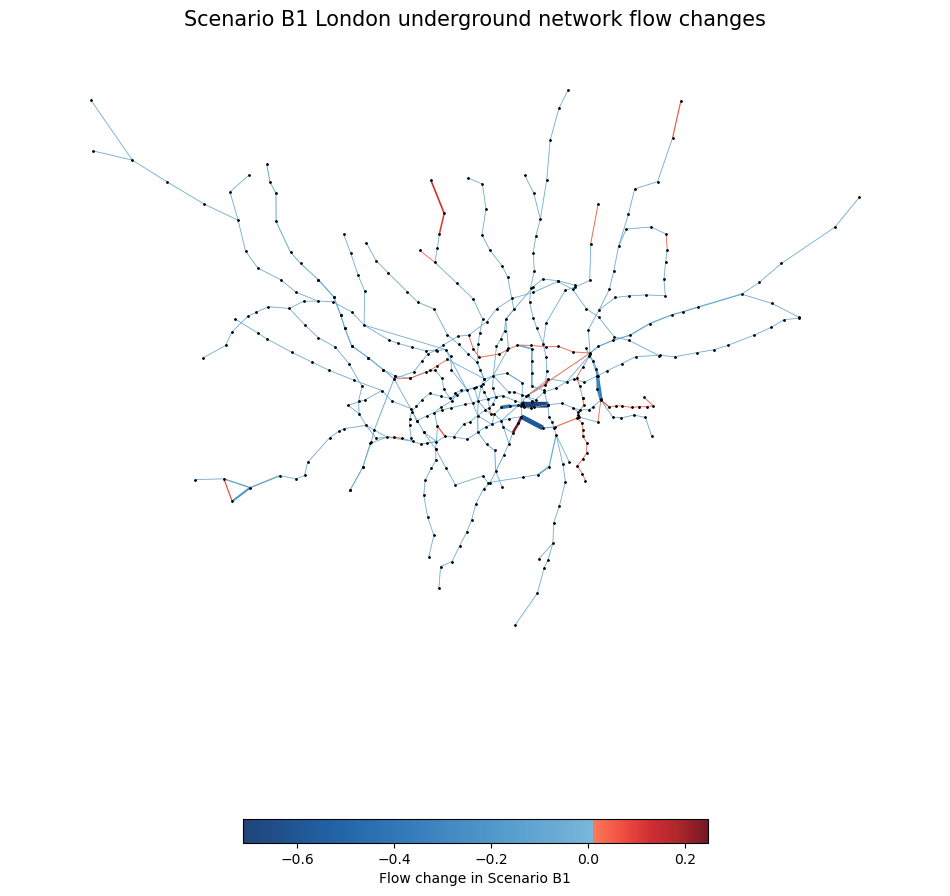

In [211]:
#Plot 
# flowB1c_values = [dfB[['flowB1c']]]
base = max(dict_B.values())-min(dict_B.values())

B1_color = []
B1_width = []
for u,d,v in G.edges(data=True):
        B1 = nx.get_edge_attributes(G,'flowB1c')
        B1_color.append(B1[(u,d)]/base)
        B1_color = pd.Series(B1_color).fillna(0).tolist()
        
        B1_width.append(0.6+(abs(B1[(u,d)])/base)*5)
        B1_width = pd.Series(B1_width).fillna(0).tolist()

# Get selected label: only top5 and least5

#排序df[flowB1c] 
flowB1c = nx.get_edge_attributes(G,'flowB1c') #get attribute
d = col.Counter(flowB1c) #排序
# d.most_common()

print('top3:')
top3 = {}
for k,v in d.most_common(5):
    top3[k]=str(nx.get_edge_attributes(G,'station_1_')[k] +', ' + nx.get_edge_attributes(G,'station_2_')[k])
    print(top3[k] + " " + str(nx.get_edge_attributes(G,'flowB1c')[k]))

    
print('last3:')    
last3 = {}
la = sorted(dict.items(flowB1c),key=lambda x:x[1])[:5]
for k,v in la:
    last3[k]= str(nx.get_edge_attributes(G,'station_1_')[k] +', ' + nx.get_edge_attributes(G,'station_2_')[k])
    print(last3[k] + " " + str(nx.get_edge_attributes(G,'flowB1c')[k]))
    
# print('top3:')
# for k,v in top3.items():
#     print(v + str(flowB1c[(v)]))
# print()
# print('last3:')
# for k,v in last3.items():
#     print(v+ str(flowB1c[(v)]))
    
    
# Plot graph
pos=pos
fig, ax = plt.subplots(figsize=(12,12))

# 自定义colormap
bottom_stack=round(256*(abs(min(dict_B.values()))/base))
top_stack = 256-bottom_stack

bottom=cm.get_cmap('Blues_r', 256)
top=cm.get_cmap('Reds',256)

newcolors = np.vstack((bottom(np.linspace(0, 0.5, bottom_stack)),
                       top(np.linspace(0.5, 1, top_stack))))
newcmp = mpl.colors.ListedColormap(newcolors, name='RedBlue')
cm.register_cmap(cmap=newcmp)


# Plot
nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.2,alpha=0.5)
edg = nx.draw_networkx_edges(G, pos,edge_color=B1_color,
                             width=B1_width,edge_cmap=newcmp,alpha =0.9)#
nx.draw_networkx_nodes(G,
                        pos = pos,
                        node_color= 'black',
                        node_size= 1)
# Label top3
# nx.draw_networkx_edge_labels(G,pos, edge_labels = top3, font_size=5.5, font_color='darkred',
#                              horizontalalignment='left', rotate = False, label_pos = 0)

# Label last3
# nx.draw_networkx_edge_labels(G,pos, edge_labels = last3, font_size=10, font_color='blue',
#                              horizontalalignment='left', rotate = False, label_pos = 0.5)

plt.colorbar(edg,label="Flow change in Scenario B1",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Scenario B1 London underground network flow changes",fontsize=15)
# plt.savefig('plot/SnB1_last3.png')
plt.savefig('plot/SnB1_top3.png')
plt.show()


## ScnB2: Trible distance

In [89]:
# Trible distance
df_udg['distance2']=df_udg['distance']*3
df_udg['log_distance2']=np.log(df_udg['distance2'])

In [90]:
# Use the beta we got from the negative exponential model
beta = -doubsim1.params[-1]

# Get the balancing factors. NB Setting of new field names for Ai and Bj.
df_udg = balance_doubly_constrained(df_udg,'Orig','Dest','O_i_db','D_j_db','distance2',-beta,'exponential','Ai_exp','Bj_exp')

# Now predict the model again using the new Ai and Dj fields.
df_udg['SIM_est_exp2'] = np.round(df_udg['O_i_db'] * df_udg['Ai_exp'] * df_udg['D_j_db'] * df_udg['Bj_exp'] * 
                                   np.exp(df_udg['distance2']*-beta))
# Check out the matrix
pd.pivot_table(df_udg,values='SIM_est_exp2',index ='Orig',columns='Dest',fill_value=0,aggfunc=sum,margins=True)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
Iteration: 72
I

Dest,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
Orig,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,599.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1223.0
Acton Town,0,0,0,1,1,0,5,0,0,2,...,9,0,0,40,0,0,0,0,0,3739.0
Aldgate,0,0,0,0,59,0,0,0,0,26,...,0,0,0,0,0,0,0,0,0,2875.0
Aldgate East,0,0,0,82,0,0,0,0,0,27,...,0,0,0,0,0,0,0,0,0,3163.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,0,36,58,0,0,0,0,13,...,0,0,0,0,0,0,0,0,0,4856.0
Woodgrange Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,528.0
Woodside Park,0,0,0,6,5,0,0,0,0,25,...,0,0,0,0,0,0,0,0,0,3088.0


### Plot B2 flow
#### 匹配起终点code

In [153]:
#获取G中的站名和编号
df_G = pd.DataFrame(index=G.nodes())
df_G['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
##df要跟graph对应不能改，所以要改df_udg里的dest，orig name
df_G = df_G.reset_index()
# df_G

In [154]:
# 融合df和G，看一下差的有哪些
dfB = df_udg.merge(df_G, how='left',left_on='Orig',right_on='station_name').drop(columns=['station_name']).rename(columns={'index':'OrigCode'})

dfB = dfB.merge(df_G, how='left',left_on='Dest',right_on='station_name').drop(columns=['station_name']).rename(columns={'index':'DestCode'})

dfB.shape[0]

64204

In [155]:
#把dfB里的Bank and Monument 换成 Bank
# Kensington------------Kensington (Olympia)
dfB=dfB.replace('Bank and Monument','Bank')
dfB = dfB.replace('Kensington','Kensington (Olympia)')

#没有Battersea Park in G，用周边的Wandsworth Road 替代
dfB = dfB.replace('Battersea Park','Wandsworth Road')

dfB

#把原来merge的两列删掉
dfB = dfB.drop(['OrigCode','DestCode'],axis=1).drop_duplicates()

#重新merge一次
dfB = dfB.merge(df_G, how='left',left_on='Orig',right_on='station_name').drop(columns=['station_name']).rename(columns={'index':'OrigCode'})

dfB = dfB.merge(df_G, how='left',left_on='Dest',right_on='station_name').drop(columns=['station_name']).rename(columns={'index':'DestCode'})

dfB #有起终点代码啦！

,Orig,Dest,flows,Oi1_pop,Dj2_job,distance,log_Oi1_pop,log_Dj2_job,log_distance,unconstrainedEst2,...,Bj_exp,SIM_est_exp,distance1,log_distance1,SIM_est_exp1,distance2,log_distance2,SIM_est_exp2,OrigCode,DestCode
0,Abbey Road,Bank,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,50,...,1.122873,77.0,16263.050194,9.696651,52.0,24394.575291,10.102116,41.0,940GZZDLABR,940GZZLUBNK
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1,...,6.869382,3.0,17020.243548,9.742159,2.0,25530.365322,10.147624,1.0,940GZZDLABR,940GZZDLBEC
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,2,...,1.235130,4.0,7550.897744,8.929422,3.0,11326.346616,9.334887,3.0,940GZZDLABR,940GZZDLBLA
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53,...,0.986905,112.0,10173.028440,9.227495,113.0,15259.542660,9.632960,109.0,940GZZDLABR,940GZZDLCAN
4,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53,...,0.986905,112.0,10173.028440,9.227495,113.0,15259.542660,9.632960,109.0,940GZZDLABR,940GZZLUCYF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64199,Woolwich Arsenal,Tower Gateway,127,7892.0,3342.0,13401.795550,8.973605,8.114325,9.503144,22,...,4.381005,185.0,26803.591100,10.196291,120.0,40205.386650,10.601756,83.0,940GZZDLWLA,940GZZDLTWG
64200,Woolwich Arsenal,West Ham,608,7892.0,5487.0,8701.454361,8.973605,8.610137,9.071245,42,...,0.446304,176.0,17402.908722,9.764393,164.0,26104.363083,10.169858,122.0,940GZZDLWLA,940GZZLUWHM
64201,Woolwich Arsenal,West India Quay,6,7892.0,400.0,9536.720451,8.973605,5.991465,9.162905,5,...,1.252880,27.0,19073.440902,9.856052,21.0,28610.161353,10.261517,17.0,940GZZDLWLA,940GZZDLWIQ
64202,Woolwich Arsenal,West Silvertown,81,7892.0,893.0,5355.248554,8.973605,6.794587,8.585832,14,...,1.266888,132.0,10710.497108,9.278980,193.0,16065.745662,9.684445,265.0,940GZZDLWLA,940GZZDLWSV


#### 把flow变化赋值到edge上

In [156]:
# 获得flow变化 flowB1c
dfB['flowB2'] = dfB['SIM_est_exp2']
dfB.head(5)

,Orig,Dest,flows,Oi1_pop,Dj2_job,distance,log_Oi1_pop,log_Dj2_job,log_distance,unconstrainedEst2,...,SIM_est_exp,distance1,log_distance1,SIM_est_exp1,distance2,log_distance2,SIM_est_exp2,OrigCode,DestCode,flowB2
0,Abbey Road,Bank,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,50,...,77.0,16263.050194,9.696651,52.0,24394.575291,10.102116,41.0,940GZZDLABR,940GZZLUBNK,41.0
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1,...,3.0,17020.243548,9.742159,2.0,25530.365322,10.147624,1.0,940GZZDLABR,940GZZDLBEC,1.0
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,2,...,4.0,7550.897744,8.929422,3.0,11326.346616,9.334887,3.0,940GZZDLABR,940GZZDLBLA,3.0
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53,...,112.0,10173.028440,9.227495,113.0,15259.542660,9.632960,109.0,940GZZDLABR,940GZZDLCAN,109.0
4,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53,...,112.0,10173.028440,9.227495,113.0,15259.542660,9.632960,109.0,940GZZDLABR,940GZZLUCYF,109.0


In [157]:
# Divide 一段起终点 into short path with 很多小段
dict_B = {}
for i in range(0,dfB.shape[0]):
    OC=dfB.at[i,'OrigCode']
    DC=dfB.at[i,'DestCode']
    path = nx.shortest_path(G,OC,DC)

#给这些小段赋值为flowB1C
    #创建一个dict，key为元组（）：flowB1c
    for n in range(0,len(path)-1):
        flow = dfB.at[i,'flowB2']
        if (path[n],path[n+1]) in dict_B == True:
            dict_B[(path[n],path[n+1])] = dict_B[(path[n],path[n+1])] + flow
        else:
            dict_B[(path[n],path[n+1])] = flow
len(dict_B)


#plot被赋予的值

958

In [158]:
#dict_B 和G不齐，dict_B缺的话G有边没属性，所以要加上0

l=[]
for u,d,v in G.edges(data=True):
    a = (u,d)
    m = a in dict_B
    if m ==False:
        l.append((u,d))

for i in range(0,len(l)):
    dict_B[l[i]]=0

len(dict_B)


965

#### Plot B2 flow

In [159]:
# set dict_B as edge_attributes
nx.set_edge_attributes(G,dict_B,'flowB2')

top3:
London Bridge, Borough
Borough, Elephant & Castle
Bethnal Green, Bethnal Green

last3:
Hackney Downs, Rectory Road
Rectory Road, Stoke Newington
Stoke Newington, Stamford Hill


E:\ProgramFiles\Anaconda\envs\urbsim\lib\site-packages\ipykernel_launcher.py:53: UserWarning: Trying to register the cmap 'RedBlue' which already exists.


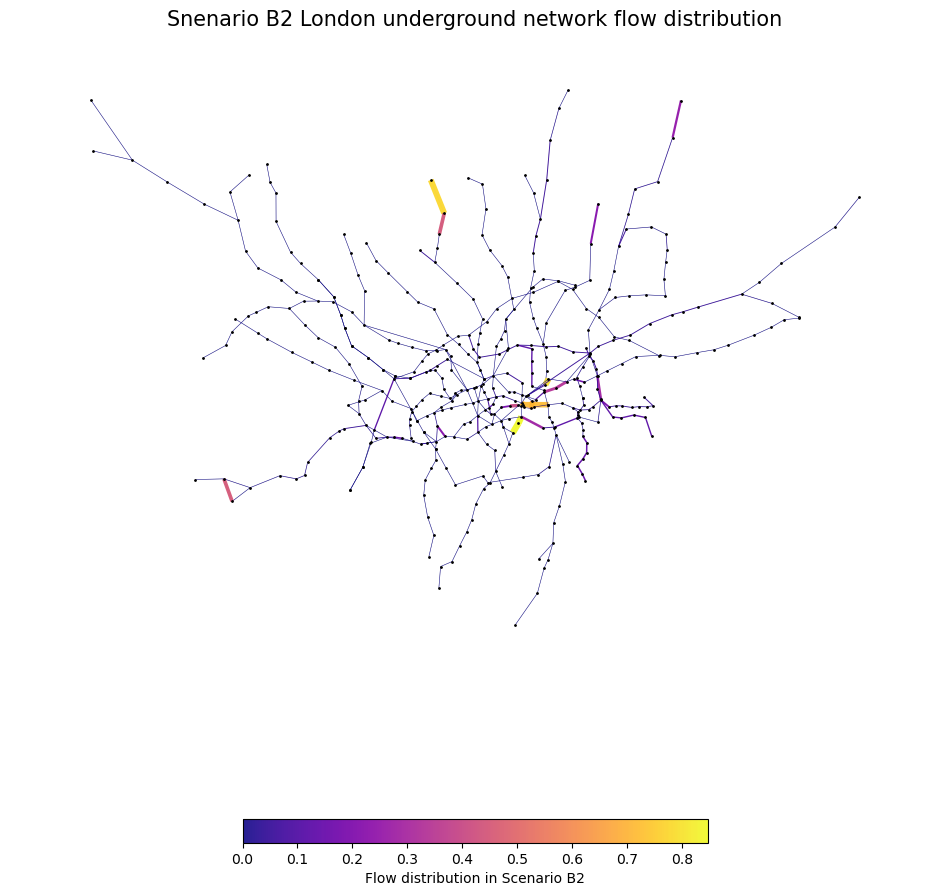

In [162]:
#Plot 
base = max(dict_B.values())-min(dict_B.values())

B2_color = []
B2_width = []
for u,d,v in G.edges(data=True):
        B2 = nx.get_edge_attributes(G,'flowB2')
        B2_color.append(B2[(u,d)]/base)
        B2_color = pd.Series(B2_color).fillna(0).tolist()
        
        B2_width.append(0.4+(abs(B2[(u,d)])/base)*5)
        B2_width = pd.Series(B2_width).fillna(0).tolist()

# Get selected label: only top5 and least5

#排序df[flowB2] 
flowB2 = nx.get_edge_attributes(G,'flowB2') #get attribute
d = col.Counter(flowB2) #排序
# d.most_common()

top3 = {}
for k,v in d.most_common(3):
    top3[k]=str(nx.get_edge_attributes(G,'station_1_')[k] +', ' + nx.get_edge_attributes(G,'station_2_')[k])

last3 = {}
la = sorted(dict.items(flowB2),key=lambda x:x[1])[:3]
for k,v in la:
    last3[k]= str(nx.get_edge_attributes(G,'station_1_')[k] +', ' + nx.get_edge_attributes(G,'station_2_')[k])

print('top3:')
for k,v in top3.items():
    print(v)
print()
print('last3:')
for k,v in last3.items():
    print(v)
    
    
# Plot graph
pos=pos
fig, ax = plt.subplots(figsize=(12,12))

# 自定义colormap
bottom_stack=round(256*(abs(min(dict_B.values()))/base))
top_stack = 256-bottom_stack

bottom=cm.get_cmap('Blues_r', 256)
top=cm.get_cmap('Reds',256)

newcolors = np.vstack((bottom(np.linspace(0, 0.5, bottom_stack)),
                       top(np.linspace(0.5, 1, top_stack))))
newcmp = mpl.colors.ListedColormap(newcolors, name='RedBlue')
cm.register_cmap(cmap=newcmp)
cmp=mpl.cm.plasma


# Plot
nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.2,alpha=0.5)
edg = nx.draw_networkx_edges(G, pos,edge_color=B2_color,
                             width=B2_width,edge_cmap=cmp,alpha =0.9)#
nx.draw_networkx_nodes(G,
                        pos = pos,
                        node_color= 'black',
                        node_size= 1)
# Label top3
# nx.draw_networkx_edge_labels(G,pos, edge_labels = top3, font_size=5.5, font_color='k',
#                              horizontalalignment='left', rotate = False, label_pos = 0)

# Label last3
# nx.draw_networkx_edge_labels(G,pos, edge_labels = last3, font_size=10, font_color='blue',
#                              horizontalalignment='left', rotate = False, label_pos = 0.5)

plt.colorbar(edg,label="Flow distribution in Scenario B2",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Snenario B2 London underground network flow distribution",fontsize=15)
# plt.savefig('plot/SnB2_last3.png')
plt.savefig('plot/SnB2_top3.png')
plt.show()


### Plot B2 change
#### 匹配起终点code

In [212]:
#获取G中的站名和编号
df_G = pd.DataFrame(index=G.nodes())
df_G['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
##df要跟graph对应不能改，所以要改df_udg里的dest，orig name
df_G = df_G.reset_index()
# df_G

In [213]:
# 融合df和G，看一下差的有哪些
dfB = df_udg.merge(df_G, how='left',left_on='Orig',right_on='station_name').drop(columns=['station_name']).rename(columns={'index':'OrigCode'})

dfB = dfB.merge(df_G, how='left',left_on='Dest',right_on='station_name').drop(columns=['station_name']).rename(columns={'index':'DestCode'})

dfB.shape[0]

64204

In [214]:
#把dfB里的Bank and Monument 换成 Bank
# Kensington------------Kensington (Olympia)
dfB=dfB.replace('Bank and Monument','Bank')
dfB = dfB.replace('Kensington','Kensington (Olympia)')

#没有Battersea Park in G，用周边的Wandsworth Road 替代
dfB = dfB.replace('Battersea Park','Wandsworth Road')

dfB

#把原来merge的两列删掉
dfB = dfB.drop(['OrigCode','DestCode'],axis=1).drop_duplicates()

#重新merge一次
dfB = dfB.merge(df_G, how='left',left_on='Orig',right_on='station_name').drop(columns=['station_name']).rename(columns={'index':'OrigCode'})

dfB = dfB.merge(df_G, how='left',left_on='Dest',right_on='station_name').drop(columns=['station_name']).rename(columns={'index':'DestCode'})

dfB #有起终点代码啦！

,Orig,Dest,flows,Oi1_pop,Dj2_job,distance,log_Oi1_pop,log_Dj2_job,log_distance,unconstrainedEst2,...,Bj_exp,SIM_est_exp,distance1,log_distance1,SIM_est_exp1,distance2,log_distance2,SIM_est_exp2,OrigCode,DestCode
0,Abbey Road,Bank,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,50,...,1.122873,77.0,16263.050194,9.696651,52.0,24394.575291,10.102116,41.0,940GZZDLABR,940GZZLUBNK
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1,...,6.869382,3.0,17020.243548,9.742159,2.0,25530.365322,10.147624,1.0,940GZZDLABR,940GZZDLBEC
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,2,...,1.235130,4.0,7550.897744,8.929422,3.0,11326.346616,9.334887,3.0,940GZZDLABR,940GZZDLBLA
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53,...,0.986905,112.0,10173.028440,9.227495,113.0,15259.542660,9.632960,109.0,940GZZDLABR,940GZZDLCAN
4,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53,...,0.986905,112.0,10173.028440,9.227495,113.0,15259.542660,9.632960,109.0,940GZZDLABR,940GZZLUCYF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64199,Woolwich Arsenal,Tower Gateway,127,7892.0,3342.0,13401.795550,8.973605,8.114325,9.503144,22,...,4.381005,185.0,26803.591100,10.196291,120.0,40205.386650,10.601756,83.0,940GZZDLWLA,940GZZDLTWG
64200,Woolwich Arsenal,West Ham,608,7892.0,5487.0,8701.454361,8.973605,8.610137,9.071245,42,...,0.446304,176.0,17402.908722,9.764393,164.0,26104.363083,10.169858,122.0,940GZZDLWLA,940GZZLUWHM
64201,Woolwich Arsenal,West India Quay,6,7892.0,400.0,9536.720451,8.973605,5.991465,9.162905,5,...,1.252880,27.0,19073.440902,9.856052,21.0,28610.161353,10.261517,17.0,940GZZDLWLA,940GZZDLWIQ
64202,Woolwich Arsenal,West Silvertown,81,7892.0,893.0,5355.248554,8.973605,6.794587,8.585832,14,...,1.266888,132.0,10710.497108,9.278980,193.0,16065.745662,9.684445,265.0,940GZZDLWLA,940GZZDLWSV


#### 把flow变化赋值到edge上

In [215]:
# 获得flow变化 flowB1c
dfB['flowB2c'] = dfB['SIM_est_exp2'] - dfB['flows']
dfB.head(5)

,Orig,Dest,flows,Oi1_pop,Dj2_job,distance,log_Oi1_pop,log_Dj2_job,log_distance,unconstrainedEst2,...,SIM_est_exp,distance1,log_distance1,SIM_est_exp1,distance2,log_distance2,SIM_est_exp2,OrigCode,DestCode,flowB2c
0,Abbey Road,Bank,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,50,...,77.0,16263.050194,9.696651,52.0,24394.575291,10.102116,41.0,940GZZDLABR,940GZZLUBNK,41.0
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1,...,3.0,17020.243548,9.742159,2.0,25530.365322,10.147624,1.0,940GZZDLABR,940GZZDLBEC,0.0
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,2,...,4.0,7550.897744,8.929422,3.0,11326.346616,9.334887,3.0,940GZZDLABR,940GZZDLBLA,0.0
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53,...,112.0,10173.028440,9.227495,113.0,15259.542660,9.632960,109.0,940GZZDLABR,940GZZDLCAN,108.0
4,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53,...,112.0,10173.028440,9.227495,113.0,15259.542660,9.632960,109.0,940GZZDLABR,940GZZLUCYF,108.0


In [216]:
# Divide 一段起终点 into short path with 很多小段
dict_B = {}
for i in range(0,dfB.shape[0]):
    OC=dfB.at[i,'OrigCode']
    DC=dfB.at[i,'DestCode']
    path = nx.shortest_path(G,OC,DC)

#给这些小段赋值为flowB1C
    #创建一个dict，key为元组（）：flowB1c
    for n in range(0,len(path)-1):
        flow = dfB.at[i,'flowB2c']
        if (path[n],path[n+1]) in dict_B == True:
            dict_B[(path[n],path[n+1])] = dict_B[(path[n],path[n+1])] + flow
        else:
            dict_B[(path[n],path[n+1])] = flow
len(dict_B)


#plot被赋予的值

958

In [217]:
#dict_B 和G不齐，dict_B缺的话G有边没属性，所以要加上0

l=[]
for u,d,v in G.edges(data=True):
    a = (u,d)
    m = a in dict_B
    if m ==False:
        l.append((u,d))

for i in range(0,len(l)):
    dict_B[l[i]]=0

len(dict_B)


965

#### Plot

In [218]:
# set dict_B as edge_attributes
nx.set_edge_attributes(G,dict_B,'flowB2c')

top5:
Bethnal Green, Bethnal Green 295.0
London Bridge, Borough 253.0
Borough, Elephant & Castle 253.0
Tower Hill, Aldgate 246.0
High Barnet, Totteridge & Whetstone 228.0
last3:
Bank, Bank (DLR) -913.0
Bank (DLR), Shadwell -913.0
London Bridge, Bermondsey -781.0
Temple, Blackfriars -496.0
West Ham, Canning Town -486.0


E:\ProgramFiles\Anaconda\envs\urbsim\lib\site-packages\ipykernel_launcher.py:58: UserWarning: Trying to register the cmap 'RedBlue' which already exists.


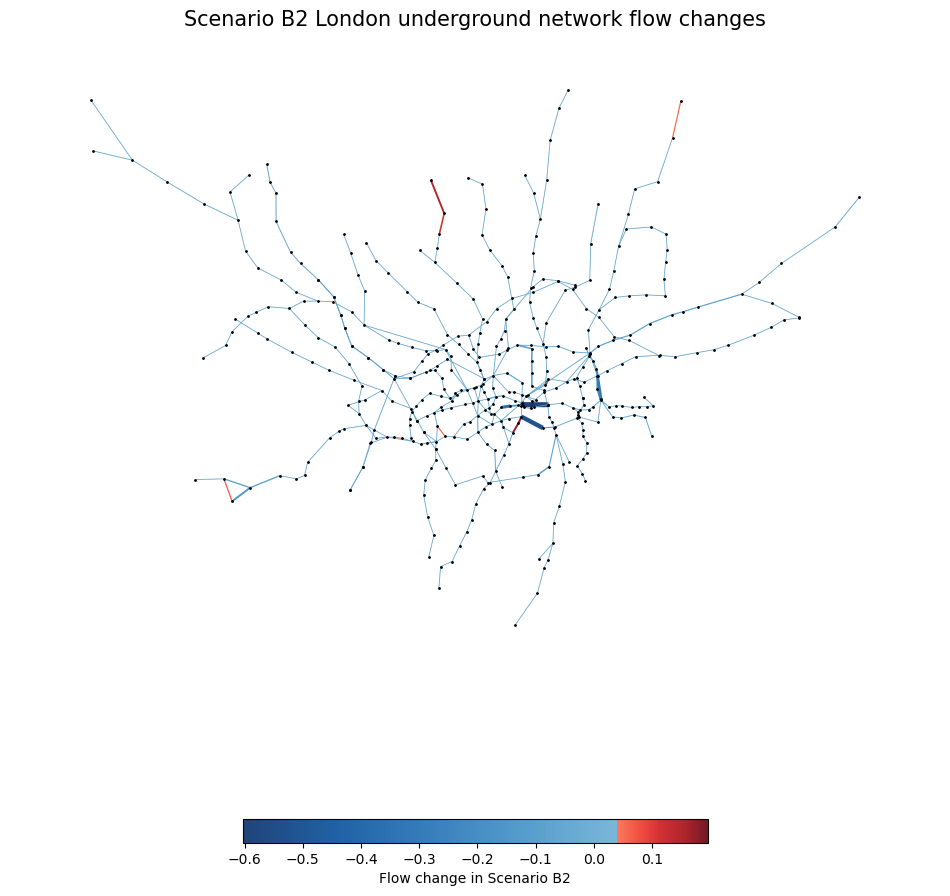

In [222]:
#Plot 
# flowB2c_values = [dfB[['flowB2c']]]
base = max(dict_B.values())-min(dict_B.values())

B2_color = []
B2_width = []
for u,d,v in G.edges(data=True):
        B2 = nx.get_edge_attributes(G,'flowB2c')
        B2_color.append(B2[(u,d)]/base)
        B2_color = pd.Series(B2_color).fillna(0).tolist()
        
        B2_width.append(0.6+(abs(B2[(u,d)])/base)*5)
        B2_width = pd.Series(B2_width).fillna(0).tolist()

# Get selected label: only top5 and least5

#排序df[flowB2c] 
flowB2c = nx.get_edge_attributes(G,'flowB2c') #get attribute
d = col.Counter(flowB2c) #排序
# d.most_common()

print('top5:')
top3 = {}
for k,v in d.most_common(5):
    top3[k]=str(nx.get_edge_attributes(G,'station_1_')[k] +', ' + nx.get_edge_attributes(G,'station_2_')[k])
    print(top3[k] + " " + str(nx.get_edge_attributes(G,'flowB2c')[k]))

print('last3:') 
last3 = {}
la = sorted(dict.items(flowB2c),key=lambda x:x[1])[:5]
for k,v in la:
    last3[k]= str(nx.get_edge_attributes(G,'station_1_')[k] +', ' + nx.get_edge_attributes(G,'station_2_')[k])
    print(last3[k] + " " + str(nx.get_edge_attributes(G,'flowB2c')[k]))

# print('top3:')
# for k,v in top3.items():
#     print(v)
# print()
# print('last3:')
# for k,v in last3.items():
#     print(v)
    
    
# Plot graph
pos=pos
fig, ax = plt.subplots(figsize=(12,12))

# 自定义colormap
bottom_stack=round(256*(abs(min(dict_B.values()))/base))
top_stack = 256-bottom_stack

bottom=cm.get_cmap('Blues_r', 256)
top=cm.get_cmap('Reds',256)

newcolors = np.vstack((bottom(np.linspace(0, 0.5, bottom_stack)),
                       top(np.linspace(0.5, 1, top_stack))))
newcmp = mpl.colors.ListedColormap(newcolors, name='RedBlue')
cm.register_cmap(cmap=newcmp)


# Plot
nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.2,alpha=0.5)
edg = nx.draw_networkx_edges(G, pos,edge_color=B2_color,
                             width=B2_width,edge_cmap=newcmp,alpha =0.9)#
nx.draw_networkx_nodes(G,
                        pos = pos,
                        node_color= 'black',
                        node_size= 1)
# Label top3
# nx.draw_networkx_edge_labels(G,pos, edge_labels = top3, font_size=5.5, font_color='darkred',
#                              horizontalalignment='left', rotate = False, label_pos = 0)

# Label last3
# nx.draw_networkx_edge_labels(G,pos, edge_labels = last3, font_size=10, font_color='blue',
#                              horizontalalignment='left', rotate = False, label_pos = 0.5)

plt.colorbar(edg,label="Flow change in Scenario B2",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Scenario B2 London underground network flow changes",fontsize=15)
# plt.savefig('plot/SnB2_last3.png')
plt.savefig('plot/SnB2_top3.png')
plt.show()


## production constrained model （二选一）

### ScnB1

In [107]:
# #create the formula (the "-1" indicates no intercept in the regression model).
# formula = 'flows ~ Orig + log_Dj2_job + log_distance1-1'
# #run a production constrained sim
# prodSimSnB = smf.glm(formula = formula, data=df_udg, family=sm.families.Poisson()).fit()
# #let's have a look at it's summary
# print(prodSimSnB.summary())

same beta,above part can be delete

In [108]:
# alpha_i = prodSim.params[0:-3]
# gamma = prodSim.params[-2]
# beta = -prodSim.params[-1]

In [109]:
# beta1 = 1 

In [110]:
# df_udg["prodsimestB1"] = np.exp(df_udg["alpha_i"]+gamma*df_udg["log_Dj2_job"] 
#                                  - beta1*df_udg["log_distance"])

# df_udg["prodsimestB1"] = round(df_udg["prodsimestB1"],0)
# #now we can convert the pivot table into a matrix
# submat_udg5 = df_udg.pivot_table(values ="prodsimestB1", index="Orig", columns = "Dest",
#                             aggfunc=np.sum, margins=True)
# submat_udg5

In [111]:
# #calculate some new wj^alpha and d_ij^beta values
# Dj2_gamma = df_udg["Dj2_job"]**gamma
# dist_beta = df_udg["distance"]**(-beta1)
# #calcualte the first stage of the Ai values
# df_udg["Ai1"] = Dj2_gamma * dist_beta
# #now do the sum over all js bit
# A_i = pd.DataFrame(df_udg.groupby(["Orig"])["Ai1"].agg(np.sum))
# #now divide into 1
# A_i["Ai1"] = 1/A_i["Ai1"]
# A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
# #and write the A_i values back into the dataframe
# df_udg = df_udg.merge(A_i, left_on="Orig", right_index=True, how="left")

In [112]:
# #to check everything works, recreate the original estimates
# df_udg["prodsimestB11"] = df_udg["A_i"]*df_udg["O_i"]*Dj2_gamma*dist_beta
# #round
# df_udg["prodsimestB11"] = round(df_udg["prodsimestB11"])
# #check
# df_udg[["prodsimest1", "prodsimestB11"]]

In [113]:
# #We can do this by pulling out the parameter values
# coefs = pd.DataFrame(prodSimSnB.params)
# coefs.reset_index(inplace=True)
# coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
# to_repl = ["(Orig)", "\[", "\]"]
# for x in to_repl:
#     coefs["coef"] = coefs["coef"].str.replace(x, "")
# #then once you have done this you can join them back into the dataframes
# df_udg = df_udg.merge(coefs, left_on="Orig", right_on="coef", how = "left")
# df_udg.drop(columns = ["coef"], inplace = True)
# #check this has worked
# df_udg.head()

In [114]:
# alpha_i = prodSimSnB.params[0:-2]
# gamma = prodSimSnB.params[-2]
# beta = -prodSimSnB.params[-1]

In [115]:
# df_udg["prodsimest_SnB"] = np.exp(df_udg["alpha_i_y"]+gamma*df_udg["log_Dj2_job"] 
#                                  - beta*df_udg["distance"])
# #or you could do it the easy way like we did last week with the fitted column (See previous practical)
# df_udg.head(10)

In [116]:
# #first round the estimates
# df_udg["prodsimest_SnB"] = round(df_udg["prodsimest_SnB"],0)
# #now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
# submat_udg_SnB_pro = df_udg.pivot_table(values ="prodsimest_SnB", index="Orig", columns = "Dest",
#                             aggfunc=np.sum, margins=True)
# submat_udg_SnB_pro

In [117]:
# # Double distance
# df_udg['distance1']=df_udg['distance']*2
# df_udg['log_distance1']=np.log(df_udg['distance1'])

##### Beta1

In [118]:
# # Get the balancing factors. NB Setting of new field names for Ai and Bj.
# df_udg = balance_doubly_constrained(df_udg,'Orig','Dest','O_i_db','D_j_db','distance1',-beta,'exponential','Ai_exp','Bj_exp')

# # Now predict the model again using the new Ai and Dj fields.
# df_udg['SIM_est_exp1'] = np.round(df_udg['O_i_db'] * df_udg['Ai_exp'] * df_udg['D_j_db'] * df_udg['Bj_exp'] * 
#                                    np.exp(df_udg['distance1']*-beta))
# # Check out the matrix
# pd.pivot_table(df_udg,values='SIM_est_exp1',index ='Orig',columns='Dest',fill_value=0,aggfunc=sum,margins=True)

In [119]:
# # groupby flows to dest
# flow_dest_db = df_udg.groupby(by='Dest').sum()
# flow_dest_db['flowB1c'] = flow_dest_db['SIM_est_exp1'] - flow_dest_db['flows'] #flow b1 changed
# flow_dest_db

In [120]:
# #获取G中的站名和编号
# dfB1 = pd.DataFrame(index=G.nodes())
# dfB1['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))

# # Merge df 和 flowAC
# dfB1 = dfB1.join(flow_dest_db,on='station_name',how='left')
# # Bethnal Green is 重复的，因为一个是railway，一个是underground station 但是在flow里没有区分，所以删掉一个
# #少了两个站可能因为Kensington 和 'Shepherd\'s Bush应该是有两个的，但是在flow里合成一个站了之类的

# dfB1 = dfB1[['station_name','flowB1c']]
# dfB1

In [121]:
# # Get the balancing factors. NB Setting of new field names for Ai and Bj.
# df_udg = balance_doubly_constrained(df_udg,'Orig','Dest','O_i_db','D_j_db','distance',-beta1,'exponential','Ai_exp','Bj_exp')

# # Now predict the model again using the new Ai and Dj fields.
# df_udg['SIM_est_exp1'] = np.round(df_udg['O_i_db'] * df_udg['Ai_exp'] * df_udg['D_j_db'] * df_udg['Bj_exp'] * 
#                                    np.exp(df_udg['distance']*-beta1))
# # Check out the matrix
# pd.pivot_table(df_udg,values='SIM_est_exp1',index ='Orig',columns='Dest',fill_value=0,aggfunc=sum,margins=True)

In [122]:
# G.number_of_edges()


In [123]:
# #subset the dataframe to the flows we want
# df_udg_flows = df_udg[["flows", "distance"]]
# #remove all 0 values (logarithms can't deal with 0 values)
# df_udg_flows = df_udg_flows[(cdata_flows!=0).all(1)]

# #extract the x and y converting to log
# x = np.log(cdata_flows["Dist"])
# y = np.log(cdata_flows["Total"])

# #create the subplot
# fig, ax = plt.subplots(figsize = (10,10))
# #plot the results along with the line of best fit
# sns.regplot(x=x, y=y, marker="+", ax=ax)
# ax.set_xlabel("log(Dist)", fontsize = 20)
# ax.set_ylabel("log(Total)", fontsize = 20)

In [124]:
# # Create df contains orig & Oi1
# Orig_Oi1 = pd.DataFrame(df_udg,columns = ['Orig','Oi1_pop'])
# Orig_Oi1 = Orig_Oi1.drop_duplicates()

# # Create df contains dest & Dj2
# Dest_Dj2 = pd.DataFrame(df_udg,columns = ['Dest','Dj2_job'])
# Dest_Dj2 = Dest_Dj2.drop_duplicates()

# # Create column of Oi2_job
# df_udg = df_udg.merge(Dest_Dj2, left_on = "Orig", right_on = "Dest")
# df_udg = df_udg.drop(columns=['Dest_y'])
# df_udg = df_udg.rename(columns = {'Dest_x':'Dest','Dj2_job_y':'Oi2_job', 'Dj2_job_x':'Dj2_job'})

# # Create column of Dj1_pop
# df_udg = df_udg.merge(Orig_Oi1, left_on = "Dest", right_on = "Orig")
# df_udg = df_udg.drop(columns=['Orig_y'])
# df_udg = df_udg.rename(columns = {'Orig_x':'Orig','Oi1_pop_x':'Oi1_pop', 'Oi1_pop_y':'Dj1_pop'})

# df_udg


In [125]:
# # 创建一个399*399行的df 包含所有O-D
# Orig_Oi1 = Orig_Oi1.reset_index().drop(columns=['index'])
# Dest_Dj2 = Dest_Dj2.reset_index().drop(columns=['index'])

# df_OD = pd.DataFrame(columns=['Orig','Dest'])

# index_j = 0
# for i in Orig_Oi1['Orig']:
    
#     for j in Dest_Dj2['Dest']:
#         df_OD.loc[index_j]=[i,j]
        
#         index_j += 1

# df_OD
    

In [126]:
# # Create a column link O-D
# df_OD['O-D']=df_OD['Orig'].map(str) + '-' + df_OD['Dest']
# df_udg['O-D']=df_udg['Orig'].map(str) + '-' + df_udg['Dest']
# df_OD

In [127]:
# df_udg

In [128]:
# n

In [129]:
# sub_df = df_OD.head()
# sub_df

# n=0
# for i in sub_df['O-D']:
#     if sub_df['O-D'].str.contains(i).any() == True:
#         df_OD.iloc[n]['link'] = 1
#     n += 1

In [130]:
# # 判断O-D：df_OD 是否在 df_udg中，有为1，无为0
# import time
# tic = time.time()


# n=0
# for i in df_OD['O-D']:
#     if df_udg['O-D'].str.contains(i).any() == True:
#         df_OD.iloc[n]['link'] = 1
#     n += 1

# df_OD

# toc = time.time()
# single = toc-tic


# # 删除df_OD中为1的行，剩余就是要补充进df_udg的

In [131]:
# df_udg['O-D'].str.contains(df_OD.iloc[0]['O-D']).any()

In [132]:
# # 增加没有联系的两个站点之间的联系为0



# df_udg_full = df_udg

# # index_i=0
# # for i in df_OD['O-D']:

# #     index_j=0
# #     for j in df_udg['O-D']:
# #         if i == j:
# #             df_udg_full = df_udg_full
# #         else:            
# #             df_add = pd.DataFrame([i,j,0,Orig_Oi1.iloc[index_i]['Oi1_pop'],Dest_Dj2.iloc[index_j]['Dj2_job'],0,0,0])
# #             df_udg_full = df_udg.append(df_add, ignore_index=True)
# #         index_j += 1
        
# #     index_i += 1
    
# index_i=0
# for i in Orig_Oi1['Orig']:
    
#     index_j=0
#     for j in Dest_Dj2['Dest']:
#         if df_udg.iloc[index_i]['Orig'] == i and df_udg.iloc[index_j]['Dest'] == j:
#             pass
#         else:
#             df_add = pd.DataFrame([i,j,0,Orig_Oi1.iloc[index_i]['Oi1_pop'],Dest_Dj2.iloc[index_j]['Dj2_job'],0,0,0])
#             df_udg_full = df_udg.append(df_add, ignore_index=True)
#         index_j += 1
            
#     index_i += 1

In [133]:
# df_OD

In [134]:
# single